In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# 1. Data load

In [2]:
G = nx.read_gml('polbooks/polbooks.gml')

G.number_of_nodes(), G.number_of_edges()

(105, 441)

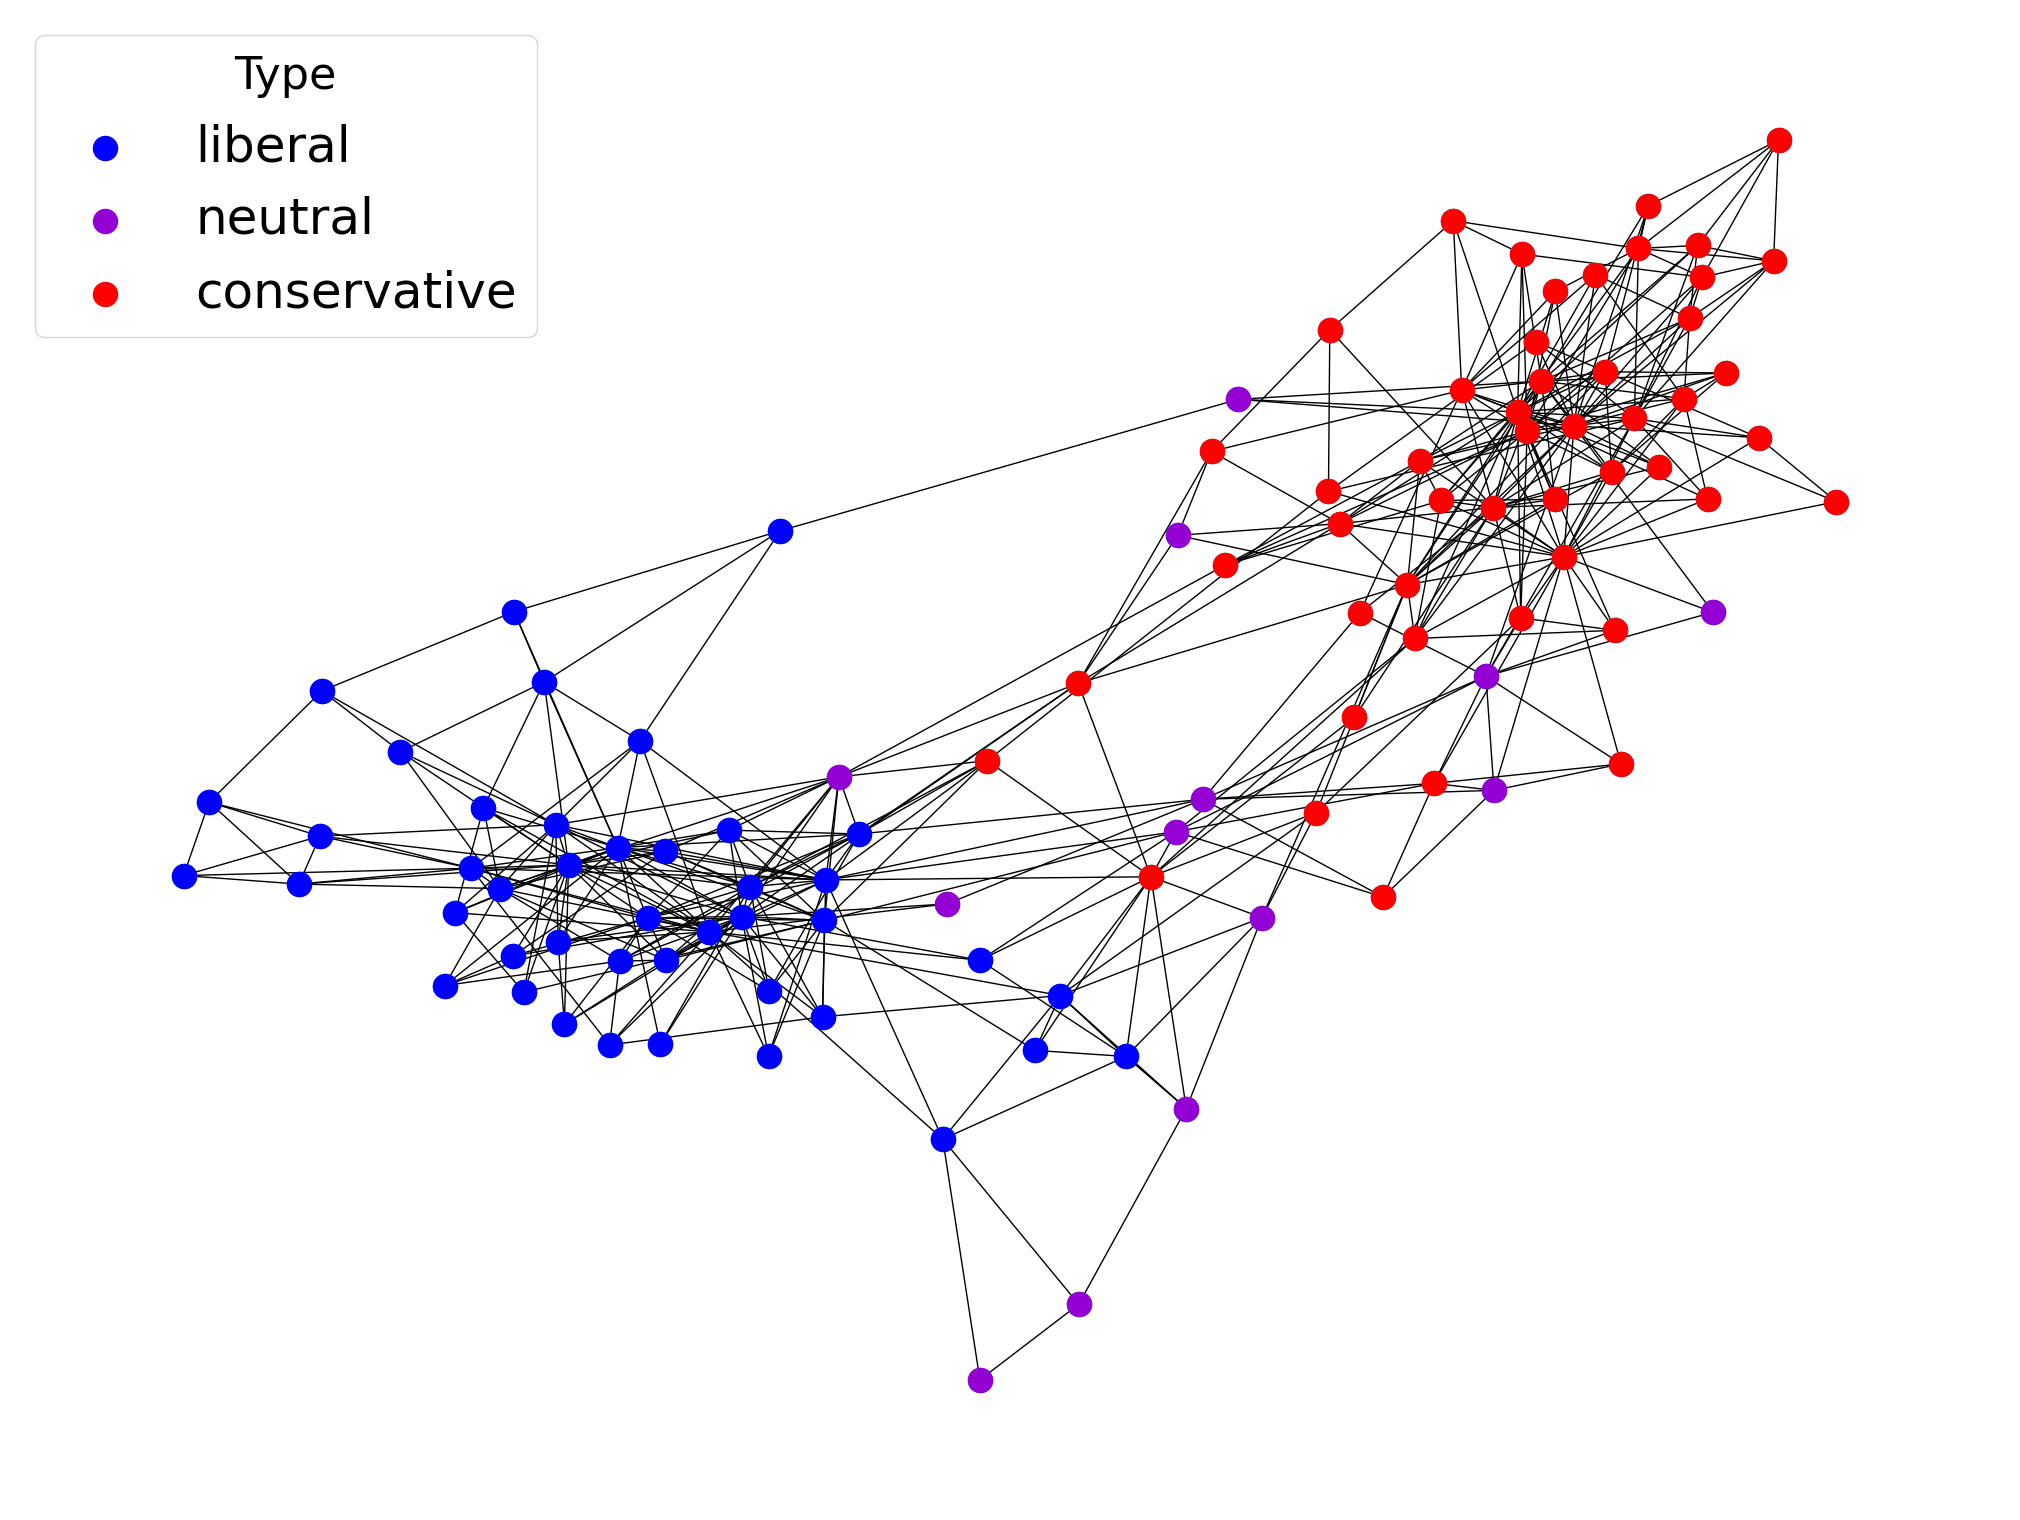

In [3]:
liberal = {node:val['value'] for node, val in G.nodes(data=True) if val['value']=='l'}
conservative = {node:val['value'] for node, val in G.nodes(data=True) if val['value']=='c'}
neutral = {node:val['value'] for node, val in G.nodes(data=True) if val['value']=='n'}

plt.figure(figsize=(20,15))
pos = nx.spring_layout(G, seed=12345)
nx.draw(G, pos)
nx.draw_networkx_nodes(G, pos, nodelist=liberal.keys(), node_color='blue', label='liberal')
nx.draw_networkx_nodes(G, pos, nodelist=neutral.keys(), node_color='darkviolet', label='neutral')
nx.draw_networkx_nodes(G, pos, nodelist=conservative.keys(), node_color='red', label='conservative')
plt.legend(fontsize=36, title="Type", title_fontsize=32)
plt.show()

# 2. Random Graph

In [4]:
from random_graph_pkg.random_graph_analysis import *

In [5]:
# 랜덤 그래프 분석 객체 생성
polbook_random_analysis = RandomGraphAnalysis(G)
print(polbook_random_analysis.degree_seq)

random graph ensemble 생성에 사용 가능한 무작위 그래프는 다음과 같습니다: ER, configuration, chunglu, BA
[6, 4, 4, 23, 8, 7, 11, 8, 25, 16, 15, 18, 25, 13, 9, 5, 3, 5, 3, 5, 10, 5, 7, 9, 9, 5, 9, 9, 3, 4, 20, 11, 5, 9, 5, 10, 5, 7, 7, 8, 18, 8, 6, 5, 5, 6, 4, 18, 4, 8, 3, 6, 5, 5, 6, 4, 4, 5, 13, 5, 6, 4, 6, 4, 9, 7, 21, 6, 4, 5, 7, 15, 22, 21, 16, 16, 13, 7, 5, 8, 4, 4, 9, 8, 23, 5, 14, 5, 5, 6, 5, 8, 3, 7, 7, 4, 6, 6, 5, 12, 12, 5, 4, 2, 3]


### - Plot Sample Random Graphs

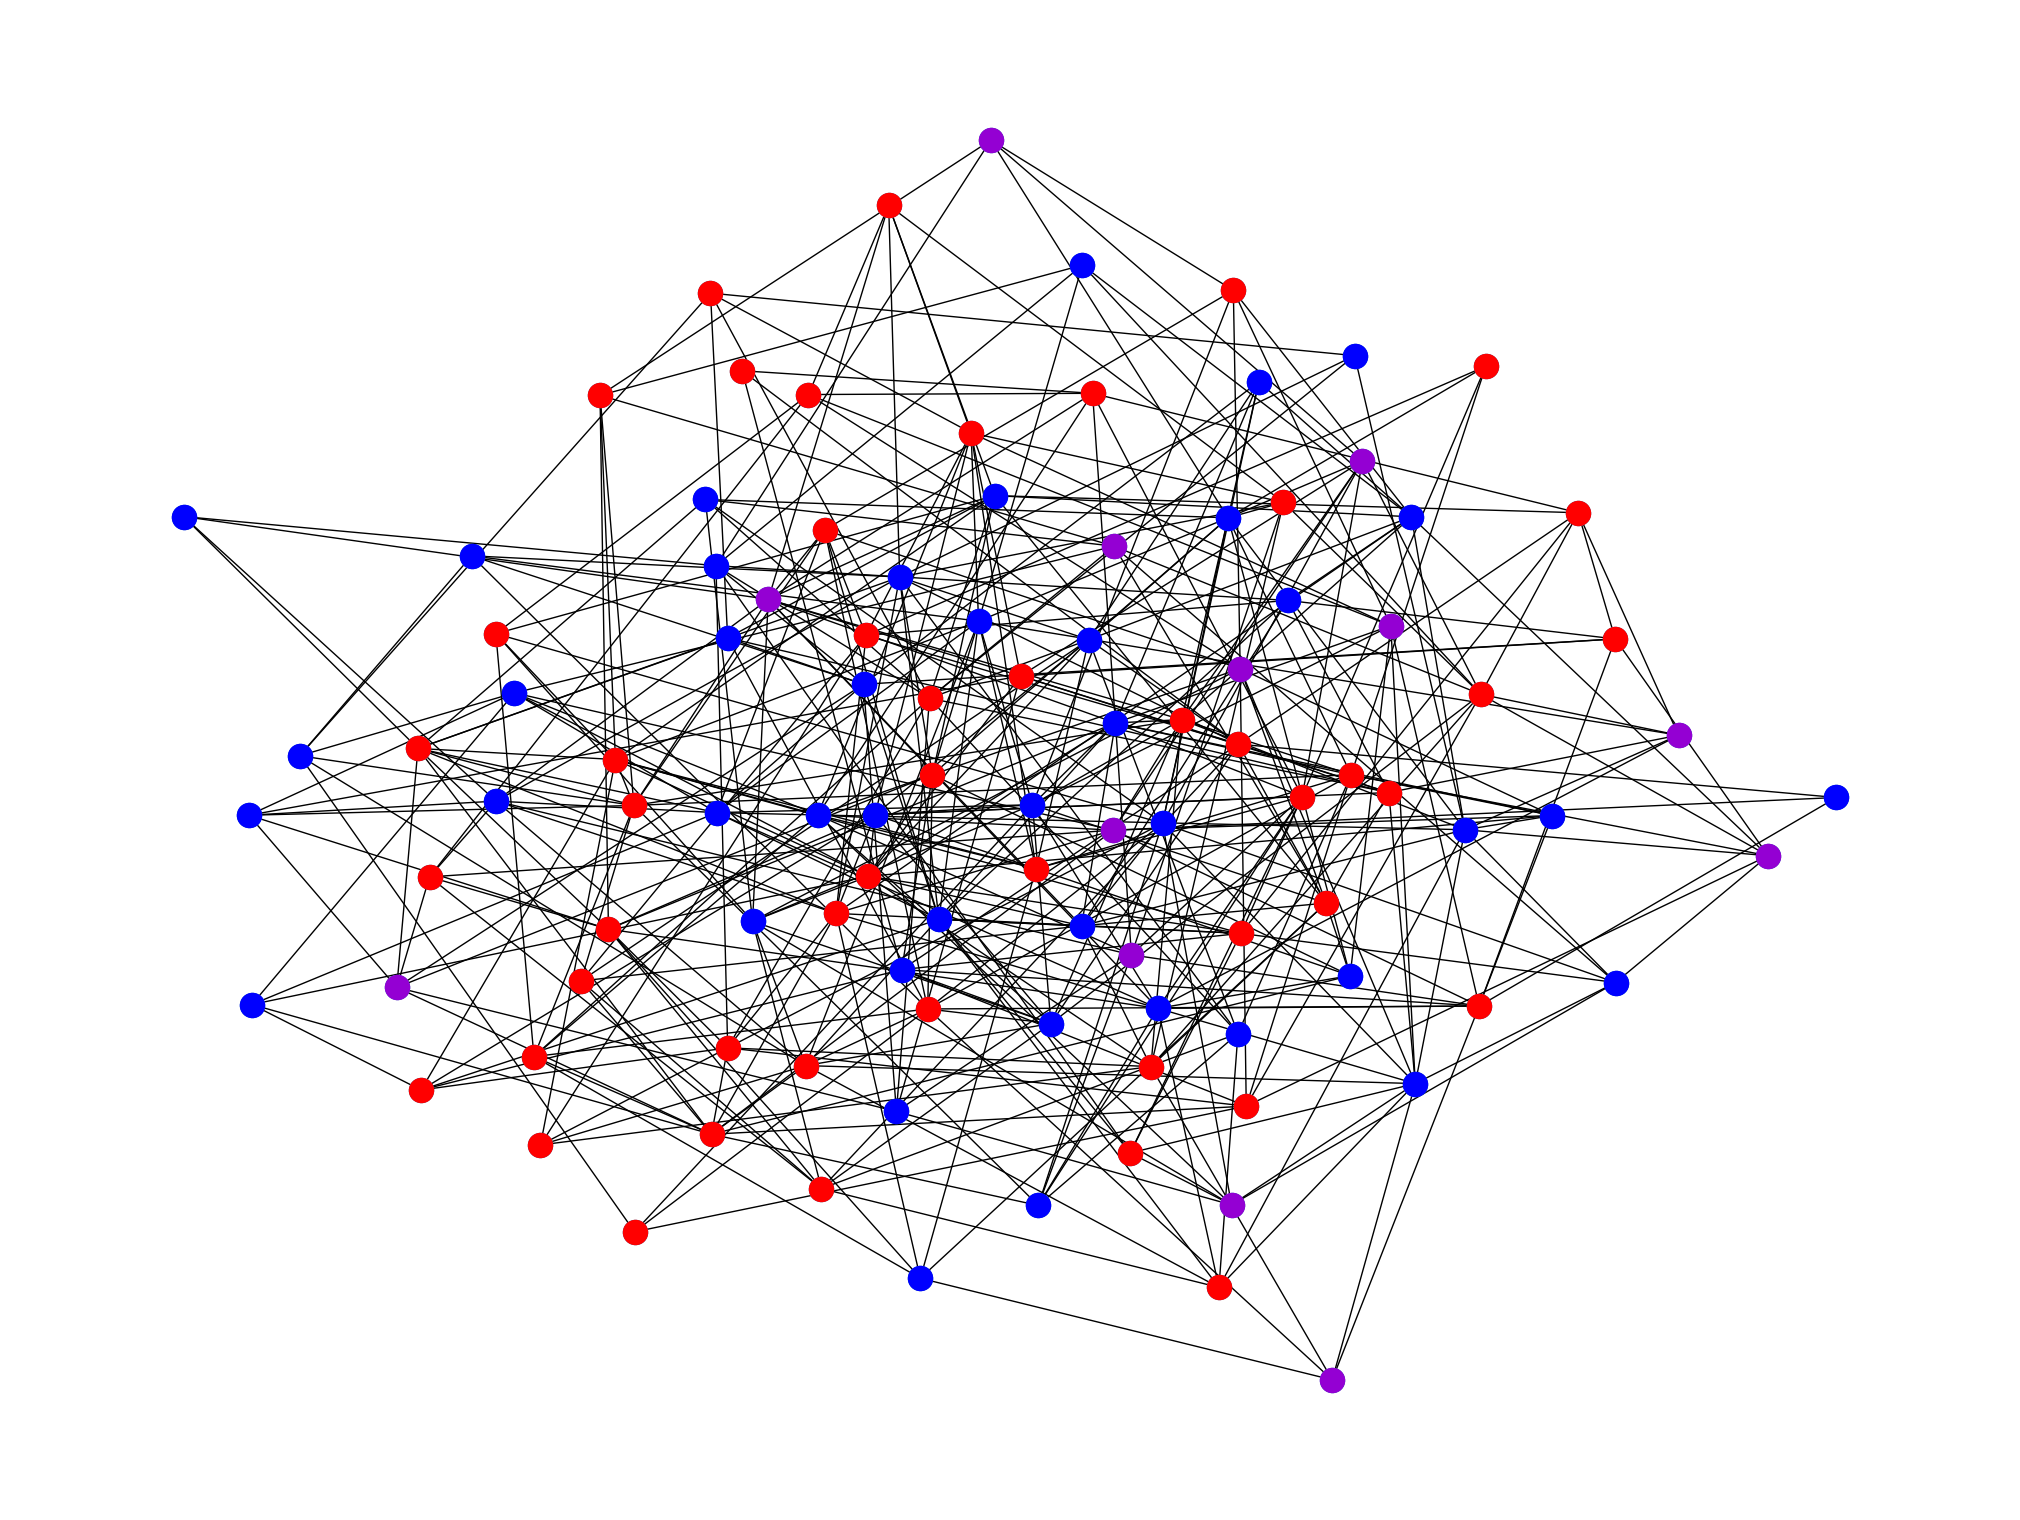

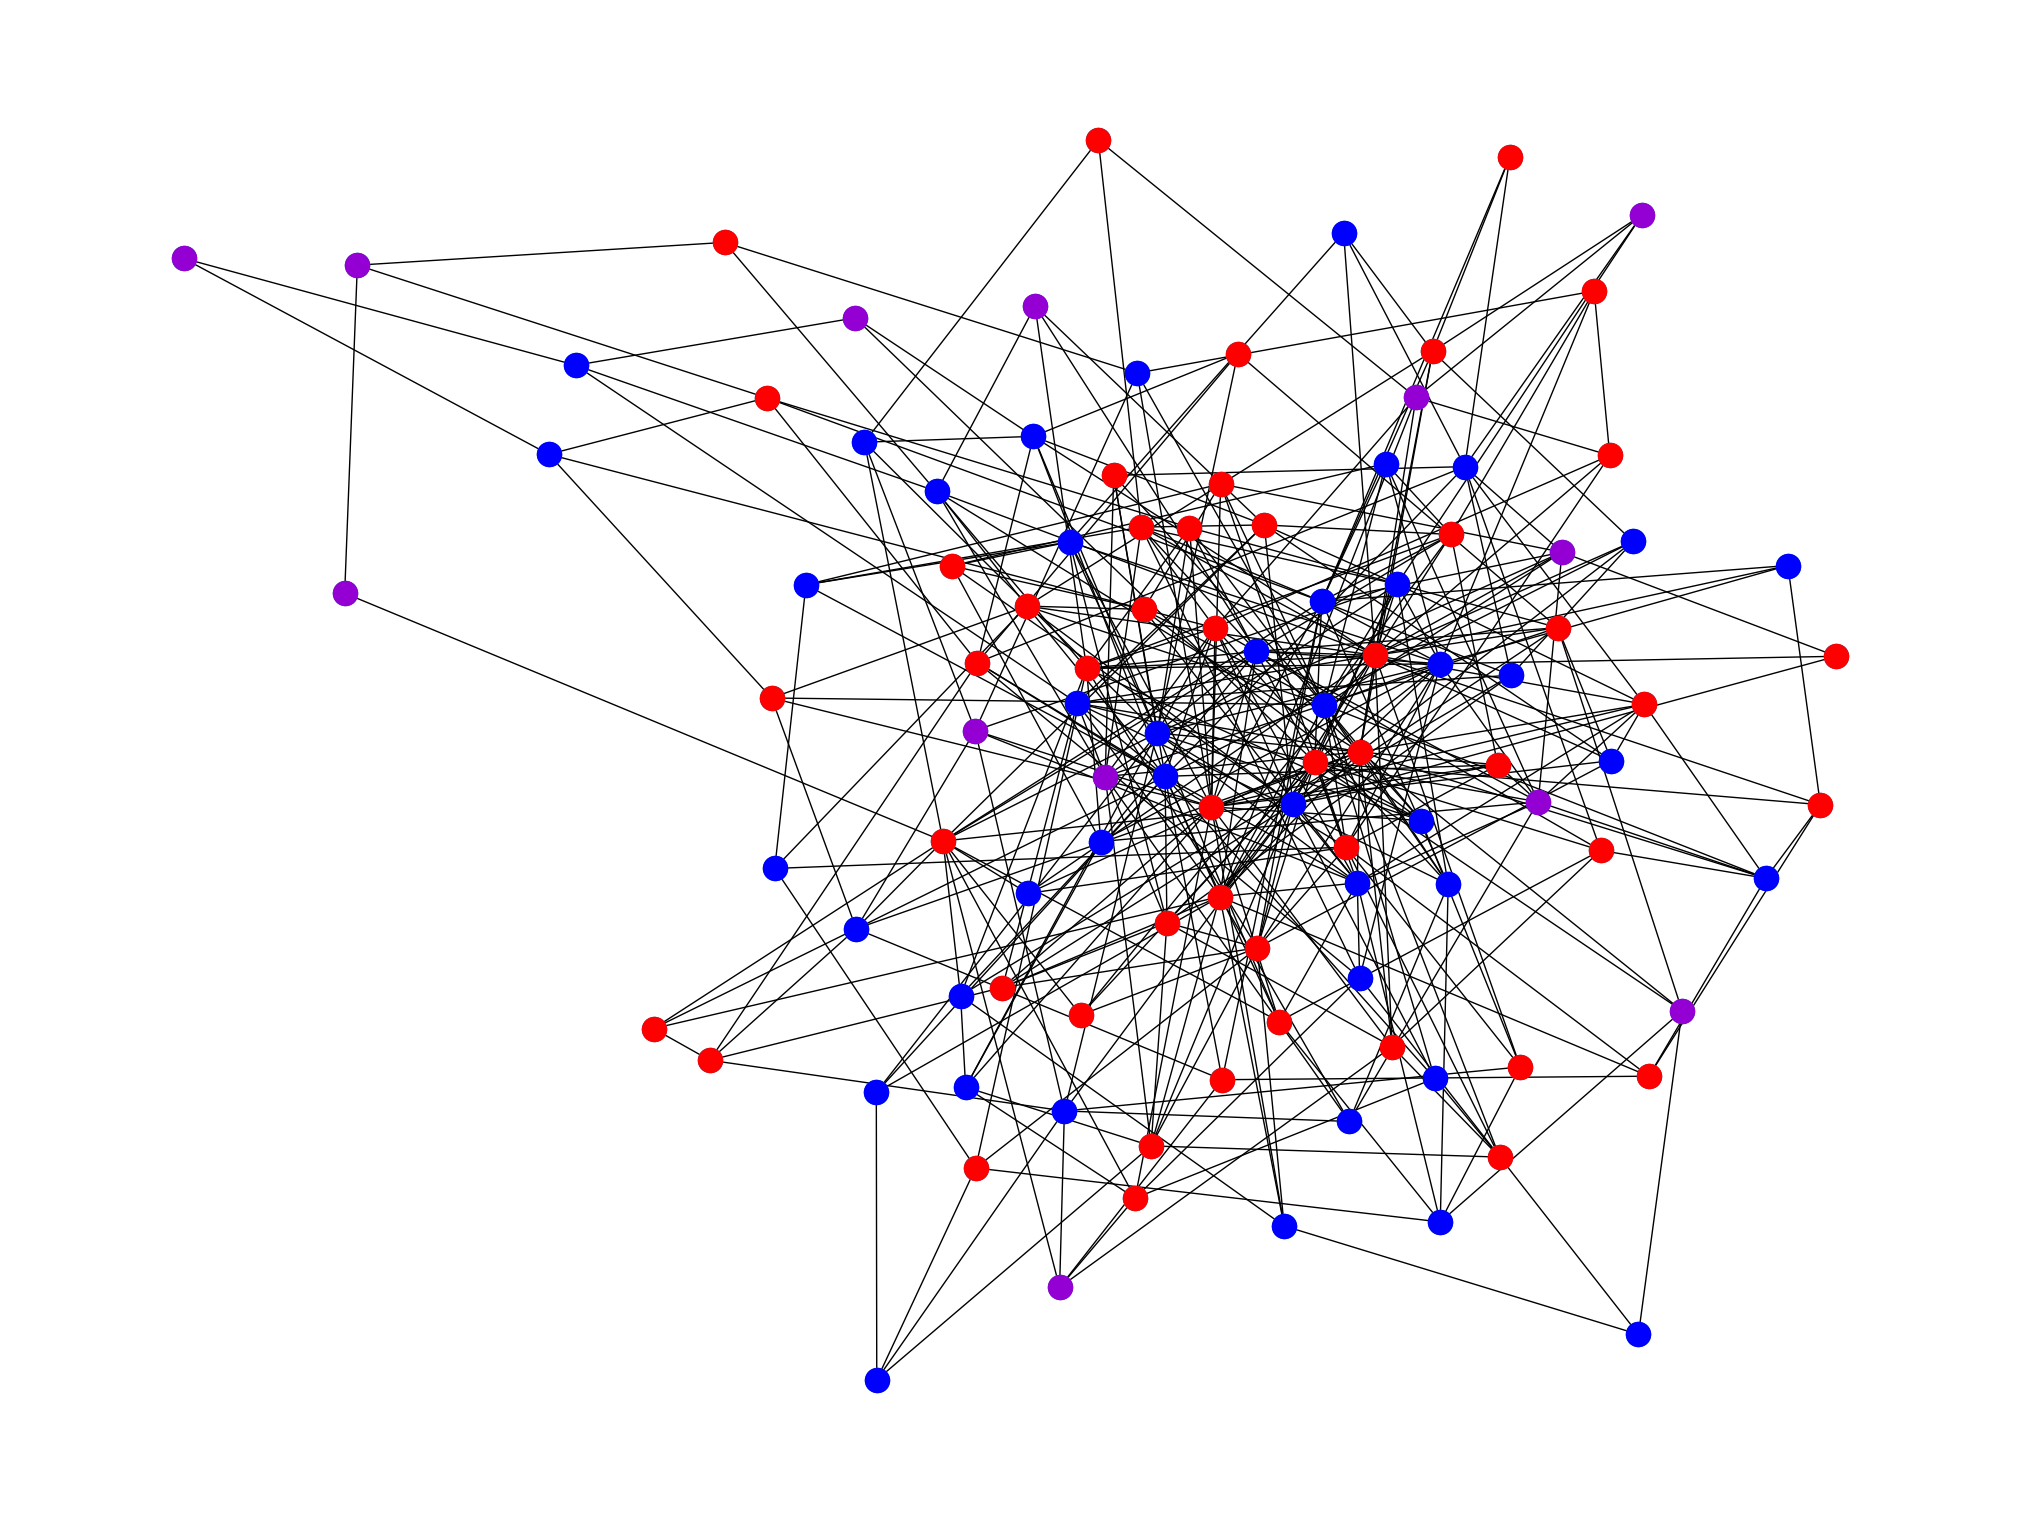

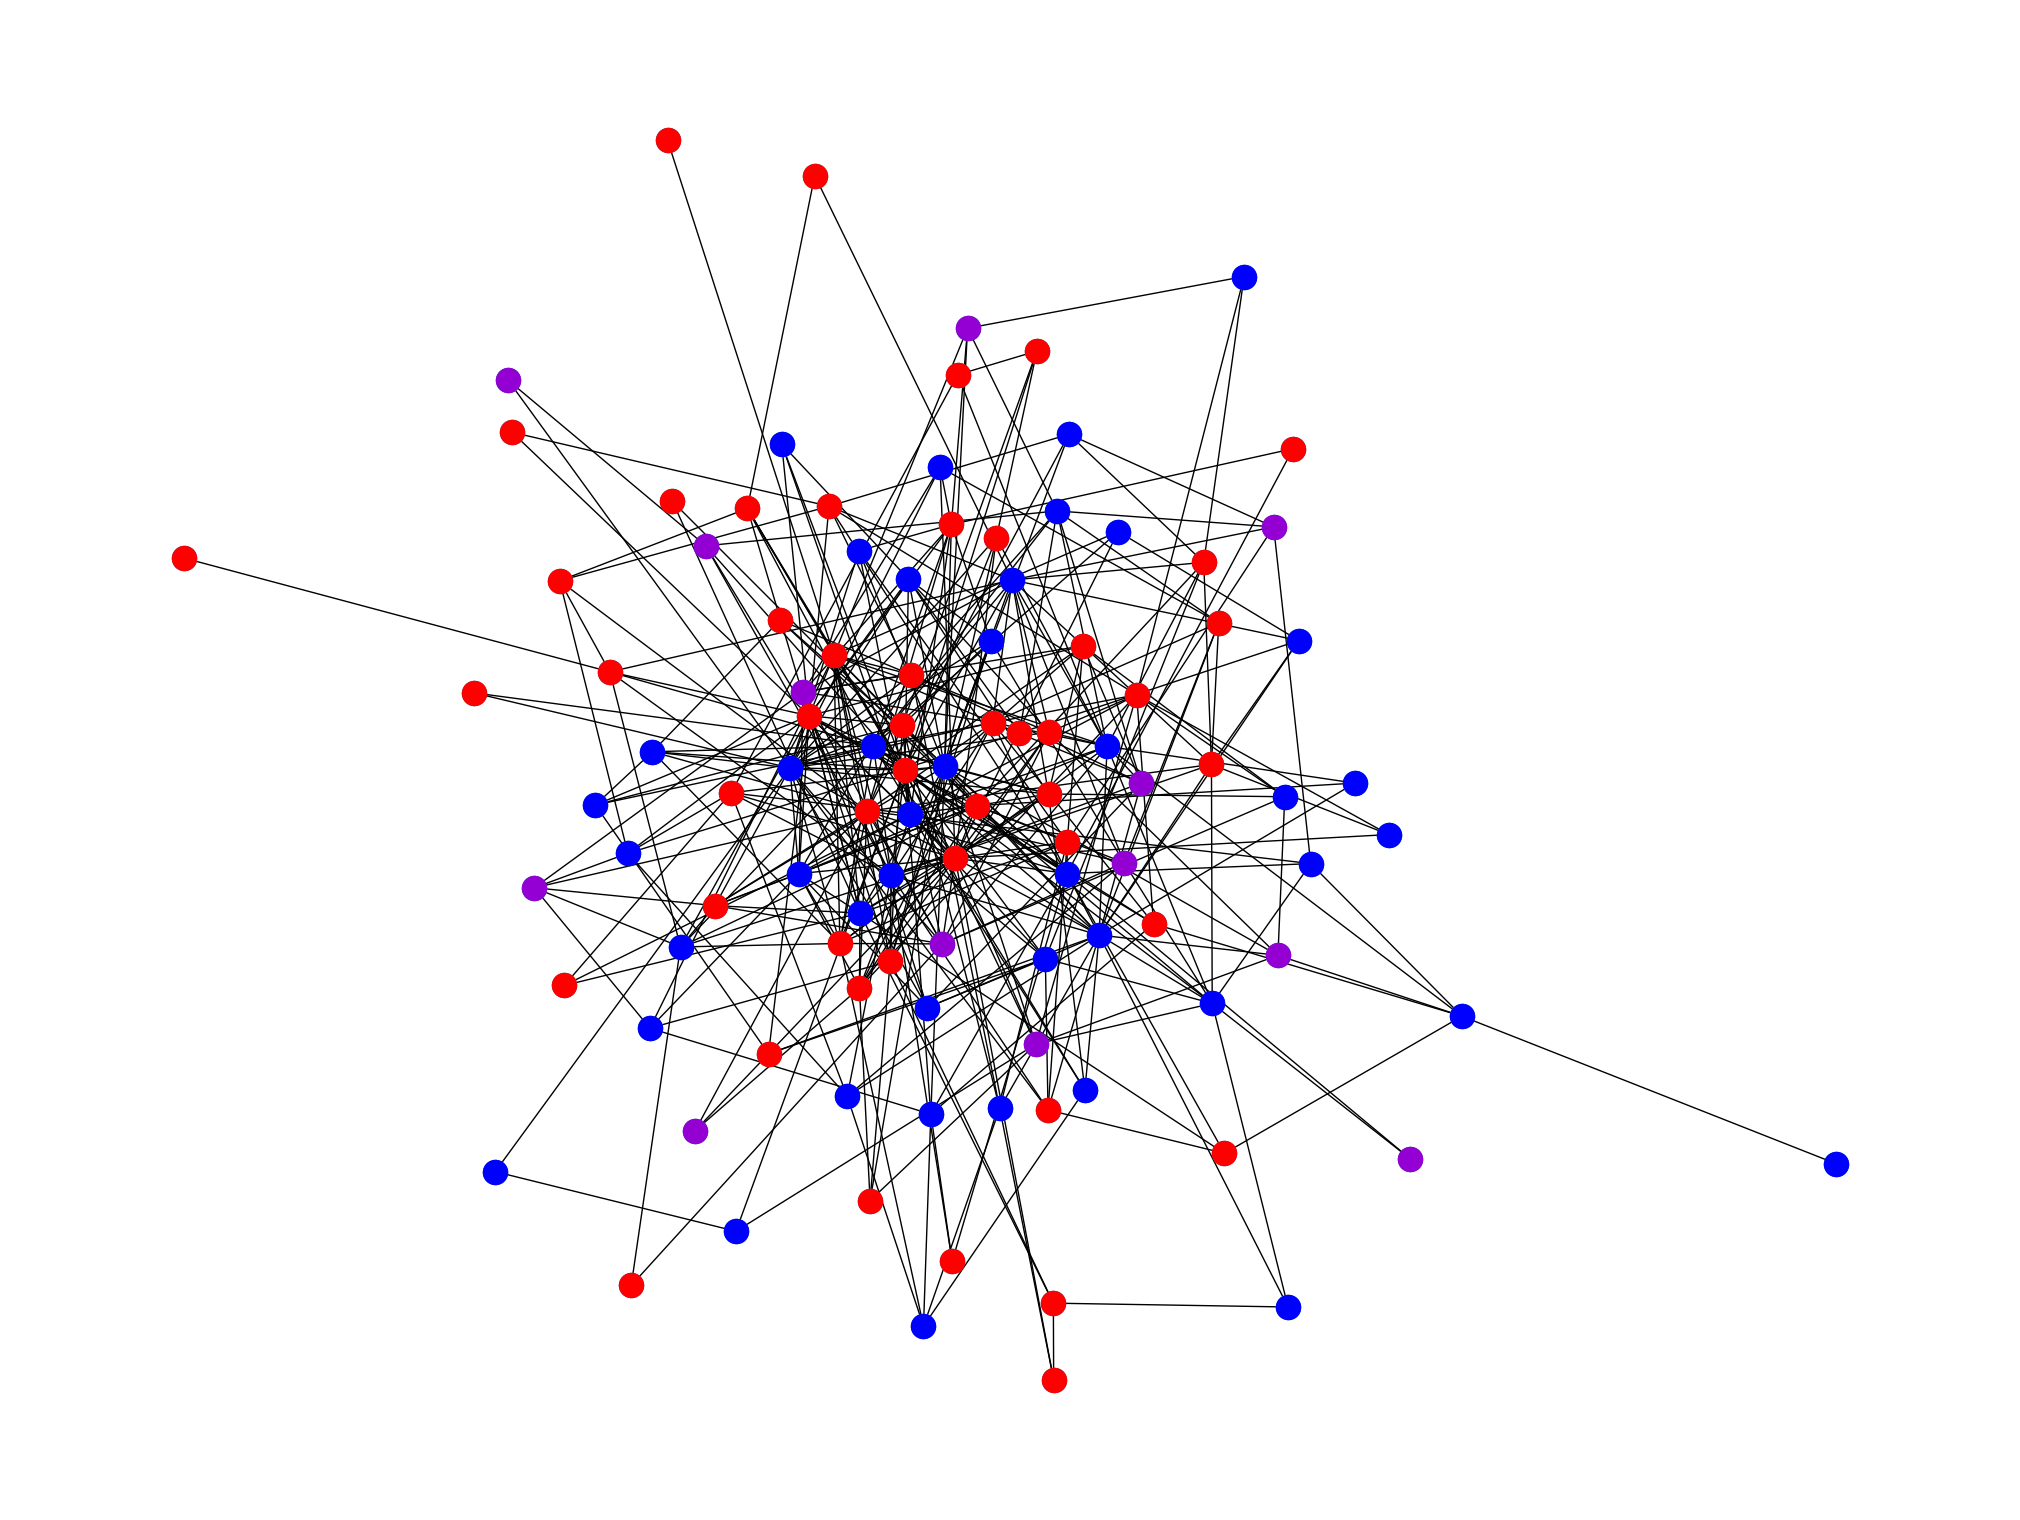

In [38]:
def sample_network_plot(sample_graph):
    liberal = {node:val['value'] for node, val in sample_graph.nodes(data=True) if val['value']=='l'}
    conservative = {node:val['value'] for node, val in sample_graph.nodes(data=True) if val['value']=='c'}
    neutral = {node:val['value'] for node, val in sample_graph.nodes(data=True) if val['value']=='n'}

    plt.figure(figsize=(20,15))
    pos = nx.spring_layout(sample_graph, seed=1234)
    nx.draw(sample_graph, pos)
    nx.draw_networkx_nodes(sample_graph, pos, nodelist=liberal.keys(), node_color='blue', label='liberal')
    nx.draw_networkx_nodes(sample_graph, pos, nodelist=neutral.keys(), node_color='darkviolet', label='neutral')
    nx.draw_networkx_nodes(sample_graph, pos, nodelist=conservative.keys(), node_color='red', label='conservative')

# ER
sample_er = polbook_random_analysis.create_ERnp_graph()
sample_network_plot(sample_er)

# Configuration
sample_config = polbook_random_analysis.create_config_graph()
sample_network_plot(sample_config)

# Chung-Lu
sample_chunglu = polbook_random_analysis.create_chunglu_graph()
sample_network_plot(sample_chunglu)

## 2.1. Degree Distribution

In [7]:
# original graph degree distribution
polbook_degree_dist = polbook_random_analysis.degree_distribution(G)
polbook_degree_dist

array([0.        , 0.        , 0.00952381, 0.05714286, 0.13333333,
       0.20952381, 0.1047619 , 0.08571429, 0.07619048, 0.07619048,
       0.01904762, 0.01904762, 0.01904762, 0.02857143, 0.00952381,
       0.01904762, 0.02857143, 0.        , 0.02857143, 0.        ,
       0.00952381, 0.01904762, 0.00952381, 0.01904762, 0.        ,
       0.01904762])

### 2.1.1. ER

In [8]:
# ER models degree distributions
num_simulations = 100
ER_models = polbook_random_analysis.create_random_graph_ensemble("ER", num_simulations=num_simulations)
ER_degree_dists = polbook_random_analysis.ensemble_degree_distributions(ER_models)
ER_degree_dists

[array([0.        , 0.        , 0.01904762, 0.02857143, 0.01904762,
        0.06666667, 0.16190476, 0.15238095, 0.14285714, 0.17142857,
        0.1047619 , 0.08571429, 0.01904762, 0.        , 0.01904762,
        0.        , 0.        , 0.00952381, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.01904762, 0.00952381, 0.04761905,
        0.08571429, 0.0952381 , 0.15238095, 0.12380952, 0.13333333,
        0.11428571, 0.08571429, 0.06666667, 0.02857143, 0.01904762,
        0.        , 0.01904762, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.00952381, 0.04761905, 0.03809524,
        0.07619048, 0.1047619 , 0.08571429, 0.12380952, 0.13333333,
        0.1047619 , 0.18095238, 0.05714286, 0.01904762, 0.        ,
        0.        , 0.        , 0.00952381, 0.00952381, 0.        ,
    

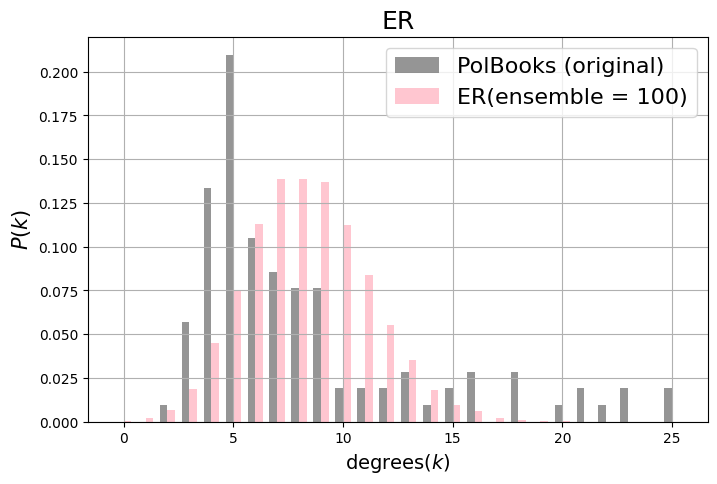

In [9]:
# figure
fig, ax = plt.subplots(1,1, figsize=(8,5))
width = 0.35

# 1. policitcal books
ax.bar(
    np.arange(len(polbook_degree_dist)) - width/2,
    polbook_degree_dist,
    alpha=0.7, color='dimgrey', label='PolBooks (original)', width=width, align='center'
)

# 2. config rd model
mean_dist = np.mean(ER_degree_dists, axis=0)
ax.bar(
    np.arange(len(polbook_degree_dist)) + width/2,
    mean_dist,
    alpha=0.9, color='pink', label='ER(ensemble = %s)' % num_simulations, width=width, align='center'
)

# decoration
ax.set_xlabel(r'degrees($k$)', fontsize=14)
ax.set_ylabel(r'$P(k)$', fontsize=15)
plt.grid()

plt.title("ER", fontsize=18)
plt.legend(fontsize=16)
plt.show()
# plt.savefig('polbooks_ER_degree_dist.pdf', bbox_inches='tight')

### 2.1.2. Configuration

In [10]:
# configuration models degree distributions
num_simulations = 100
config_models = polbook_random_analysis.create_random_graph_ensemble("configuration", num_simulations=num_simulations)
config_degree_dists = polbook_random_analysis.ensemble_degree_distributions(config_models)
config_degree_dists

[array([0.        , 0.        , 0.00952381, 0.05714286, 0.17142857,
        0.18095238, 0.11428571, 0.08571429, 0.0952381 , 0.06666667,
        0.01904762, 0.02857143, 0.00952381, 0.01904762, 0.        ,
        0.02857143, 0.00952381, 0.00952381, 0.03809524, 0.        ,
        0.02857143, 0.01904762, 0.00952381, 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.00952381, 0.06666667, 0.14285714,
        0.2       , 0.14285714, 0.07619048, 0.05714286, 0.08571429,
        0.00952381, 0.00952381, 0.01904762, 0.01904762, 0.02857143,
        0.01904762, 0.02857143, 0.02857143, 0.01904762, 0.00952381,
        0.        , 0.00952381, 0.00952381, 0.        , 0.        ,
        0.00952381]),
 array([0.        , 0.        , 0.00952381, 0.05714286, 0.17142857,
        0.18095238, 0.13333333, 0.11428571, 0.02857143, 0.05714286,
        0.03809524, 0.01904762, 0.01904762, 0.01904762, 0.01904762,
        0.04761905, 0.01904762, 0.        , 0.01904762, 0.01904762,
    

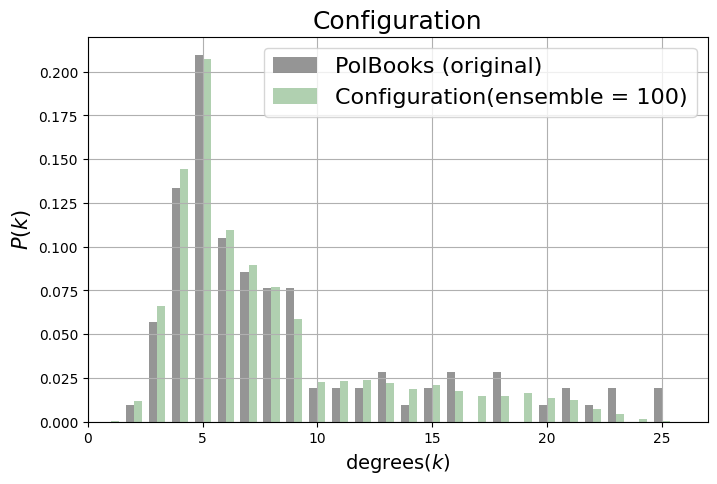

In [11]:
# figure
fig, ax = plt.subplots(1,1, figsize=(8,5))
width = 0.35

# 1. policitcal books
ax.bar(
    np.arange(len(polbook_degree_dist)) - width/2,
    polbook_degree_dist,
    alpha=0.7, color='dimgrey', label='PolBooks (original)', width=width, align='center'
)

# 2. config rd model
mean_dist = np.mean(config_degree_dists, axis=0)
ax.bar(
    np.arange(len(polbook_degree_dist)) + width/2,
    mean_dist,
    alpha=0.7, color='darkseagreen', label='Configuration(ensemble = %s)' % num_simulations, width=width, align='center'
)

# decoration
ax.set_xlabel(r'degrees($k$)', fontsize=14)
ax.set_ylabel(r'$P(k)$', fontsize=15)
plt.grid()
plt.xlim(0,27)

plt.title("Configuration", fontsize=18)
plt.legend(fontsize=16)
plt.show()
# plt.savefig('polbooks_config_degree_dist.pdf', bbox_inches='tight')

### 2.1.3. Chung-Lu

In [12]:
# chung-lu models degree distributions
num_simulations = 100
chunglu_models = polbook_random_analysis.create_random_graph_ensemble("chunglu", num_simulations=num_simulations)
chunglu_degree_dists = polbook_random_analysis.ensemble_degree_distributions(chunglu_models)
chunglu_degree_dists

[array([0.        , 0.01904762, 0.01904762, 0.08571429, 0.14285714,
        0.11428571, 0.08571429, 0.05714286, 0.11428571, 0.02857143,
        0.05714286, 0.03809524, 0.01904762, 0.04761905, 0.        ,
        0.04761905, 0.        , 0.00952381, 0.01904762, 0.        ,
        0.00952381, 0.02857143, 0.02857143, 0.00952381, 0.00952381,
        0.00952381]),
 array([0.        , 0.01941748, 0.06796117, 0.10679612, 0.09708738,
        0.06796117, 0.11650485, 0.09708738, 0.03883495, 0.08737864,
        0.02912621, 0.04854369, 0.04854369, 0.01941748, 0.01941748,
        0.01941748, 0.        , 0.01941748, 0.        , 0.00970874,
        0.01941748, 0.00970874, 0.01941748, 0.01941748, 0.00970874,
        0.00970874]),
 array([0.01923077, 0.05769231, 0.01923077, 0.06730769, 0.11538462,
        0.13461538, 0.09615385, 0.08653846, 0.04807692, 0.04807692,
        0.07692308, 0.02884615, 0.02884615, 0.00961538, 0.00961538,
        0.        , 0.02884615, 0.01923077, 0.01923077, 0.02884615,
    

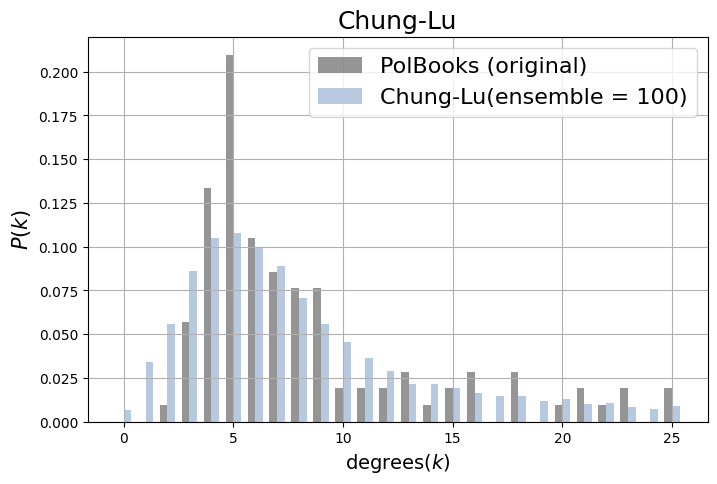

In [13]:
# figure
fig, ax = plt.subplots(1,1, figsize=(8,5))
width = 0.35

# 1. policitcal books
ax.bar(
    np.arange(len(polbook_degree_dist)) - width/2,
    polbook_degree_dist,
    alpha=0.7, color='dimgrey', label='PolBooks (original)', width=width, align='center'
)

# 2. config rd model
mean_dist = np.mean(chunglu_degree_dists, axis=0)
ax.bar(
    np.arange(len(polbook_degree_dist)) + width/2,
    mean_dist,
    alpha=0.9, color='lightsteelblue', label='Chung-Lu(ensemble = %s)' % num_simulations, width=width, align='center'
)

# decoration
ax.set_xlabel(r'degrees($k$)', fontsize=14)
ax.set_ylabel(r'$P(k)$', fontsize=15)
plt.grid()

plt.title("Chung-Lu", fontsize=18)
plt.legend(fontsize=16)
plt.show()
# plt.savefig('polbooks_chunglu_degree_dist.pdf', bbox_inches='tight')

## 2.2. Centrality

In [14]:
er_models = polbook_random_analysis.create_random_graph_ensemble("ER", num_simulations)

config_models = polbook_random_analysis.create_random_graph_ensemble("configuration", num_simulations)

chunglu_models = polbook_random_analysis.create_random_graph_ensemble("chunglu", num_simulations)

# 2. 중심성 지표 계산

# 평균 중심성 계산 함수
def calculate_mean_centrality(models, centrality_func):
    values_list = []
    for G in models:
        values_list.append(list(centrality_func(G).values()))
    return np.mean(values_list, axis=0)

# A. 원본 네트워크 중심성
orig_dc = list(nx.degree_centrality(G).values())
orig_bc = list(nx.betweenness_centrality(G).values())

# B. 앙상블 평균 중심성 (각 모델별)
# ER
mean_er_dc = calculate_mean_centrality(er_models, nx.degree_centrality)
mean_er_bc = calculate_mean_centrality(er_models, nx.betweenness_centrality)

# Configuration
mean_cm_dc = calculate_mean_centrality(config_models, nx.degree_centrality)
mean_cm_bc = calculate_mean_centrality(config_models, nx.betweenness_centrality)

# Chung-Lu
mean_cl_dc = calculate_mean_centrality(chunglu_models, nx.degree_centrality)
mean_cl_bc = calculate_mean_centrality(chunglu_models, nx.betweenness_centrality)

### 2.2.1. Centrality Distribution

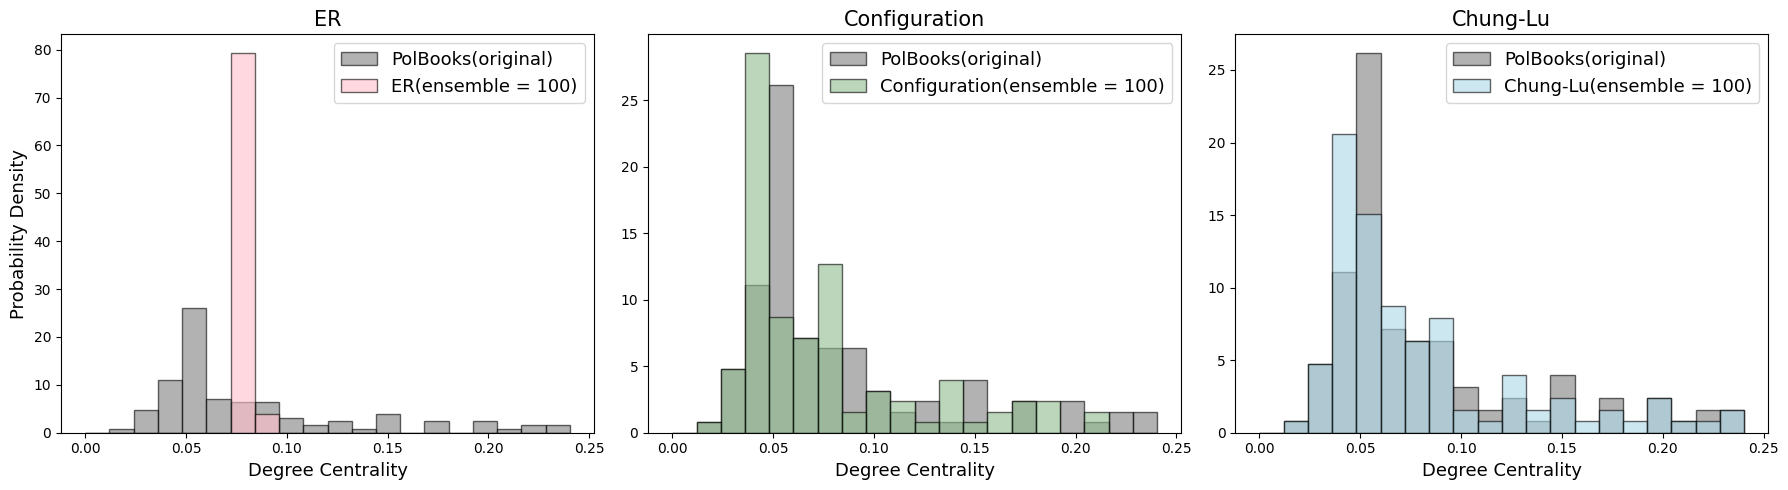

In [15]:
max_dc = max(max(orig_dc), max(mean_er_dc), max(mean_cm_dc), max(mean_cl_dc))
bins_dc = np.linspace(0, max_dc, 21)

max_bc = max(max(orig_bc), max(mean_er_bc), max(mean_cm_bc), max(mean_cl_bc))
bins_bc = np.linspace(0, max_bc, 21)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
alpha_val = 0.6
edge_color = 'black'

# 1. Degree Centrality
# ER
axes[0].hist(orig_dc, bins=bins_dc, alpha=alpha_val, edgecolor=edge_color, label='PolBooks(original)', color='gray', density=True)
axes[0].hist(mean_er_dc, bins=bins_dc, alpha=alpha_val, edgecolor=edge_color, label='ER(ensemble = %s)' % num_simulations, color='pink', density=True)
axes[0].set_title("ER",fontsize=15)
axes[0].set_xlabel("Degree Centrality",fontsize=13)
axes[0].set_ylabel('Probability Density', fontsize = 13)
axes[0].legend(fontsize=13)

# Config
axes[1].hist(orig_dc, bins=bins_dc, alpha=alpha_val, edgecolor=edge_color, label='PolBooks(original)', color='gray', density=True)
axes[1].hist(mean_cm_dc, bins=bins_dc, alpha=alpha_val, edgecolor=edge_color, label='Configuration(ensemble = %s)' % num_simulations, color='darkseagreen', density=True)
axes[1].set_title("Configuration",fontsize=15)
axes[1].set_xlabel("Degree Centrality",fontsize=13)
axes[1].legend(fontsize=13)

# Chung-Lu
axes[2].hist(orig_dc, bins=bins_dc, alpha=alpha_val, edgecolor=edge_color, label='PolBooks(original)', color='gray', density=True)
axes[2].hist(mean_cl_dc, bins=bins_dc, alpha=alpha_val, edgecolor=edge_color, label='Chung-Lu(ensemble = %s)' % num_simulations, color='lightblue', density=True)
axes[2].set_title("Chung-Lu",fontsize=15)
axes[2].set_xlabel("Degree Centrality",fontsize=13)
axes[2].legend(fontsize=13)

plt.tight_layout()
plt.show()

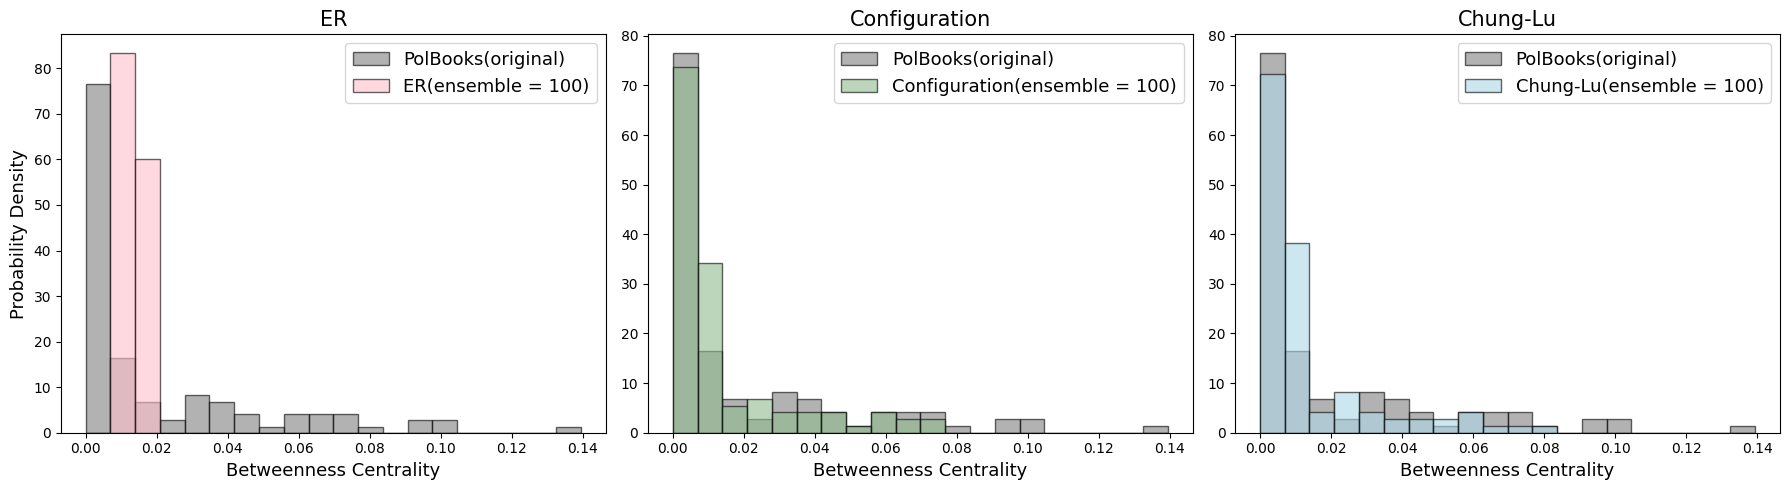

In [16]:
max_dc = max(max(orig_dc), max(mean_er_dc), max(mean_cm_dc), max(mean_cl_dc))
bins_dc = np.linspace(0, max_dc, 21)

max_bc = max(max(orig_bc), max(mean_er_bc), max(mean_cm_bc), max(mean_cl_bc))
bins_bc = np.linspace(0, max_bc, 21)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
alpha_val = 0.6
edge_color = 'black'

# 2. Betweenness Centrality
# ER
axes[0].hist(orig_bc, bins=bins_bc, alpha=alpha_val, edgecolor=edge_color, label='PolBooks(original)', color='gray', density=True)
axes[0].hist(mean_er_bc, bins=bins_bc, alpha=alpha_val, edgecolor=edge_color, label='ER(ensemble = %s)' % num_simulations, color='pink', density=True)
axes[0].set_title("ER",fontsize=15)
axes[0].set_xlabel("Betweenness Centrality",fontsize=13)
axes[0].set_ylabel('Probability Density', fontsize = 13)
axes[0].legend(fontsize=13)

# Config
axes[1].hist(orig_bc, bins=bins_bc, alpha=alpha_val, edgecolor=edge_color, label='PolBooks(original)', color='gray', density=True)
axes[1].hist(mean_cm_bc, bins=bins_bc, alpha=alpha_val, edgecolor=edge_color, label='Configuration(ensemble = %s)' % num_simulations, color='darkseagreen', density=True)
axes[1].set_title("Configuration",fontsize=15)
axes[1].set_xlabel("Betweenness Centrality",fontsize=13)
axes[1].legend(fontsize=13)

# Chung-Lu
axes[2].hist(orig_bc, bins=bins_bc, alpha=alpha_val, edgecolor=edge_color, label='PolBooks(original)', color='gray', density=True)
axes[2].hist(mean_cl_bc, bins=bins_bc, alpha=alpha_val, edgecolor=edge_color, label='Chung-Lu(ensemble = %s)' % num_simulations, color='lightblue', density=True)
axes[2].set_title("Chung-Lu",fontsize=15)
axes[2].set_xlabel("Betweenness Centrality",fontsize=13)
axes[2].legend(fontsize=13)

plt.tight_layout()
plt.show()

### 2.2.2. Random Model Average Centrality

원본 네트워크 상에서의 엣지 연결과의 비교를 위해 원본 네트워크의 layout 사용

In [17]:
# mean_er_dc, mean_er_bc
centralities = ['dgr_cen','cls_cen','har_cen','btw_cen']
node_attributes = {}
for i, (node, val) in enumerate(G.nodes(data=True)):
  node_attributes[node] = {'label':val['value'],
                           'mean_er_dc':mean_er_dc[i], 'mean_er_bc':mean_er_bc[i],
                           'mean_cm_dc':mean_cm_dc[i], 'mean_cm_bc':mean_cm_bc[i],
                           'mean_cl_dc':mean_cl_dc[i], 'mean_cl_bc':mean_cl_bc[i]}
liberal = {node:atts for node, atts in node_attributes.items() if atts['label']=='l'}
conservative = {node:atts for node, atts in node_attributes.items() if atts['label']=='c'}
neutral = {node:atts for node, atts in node_attributes.items() if atts['label']=='n'}

#### 2.2.2.1 Degree Centrality

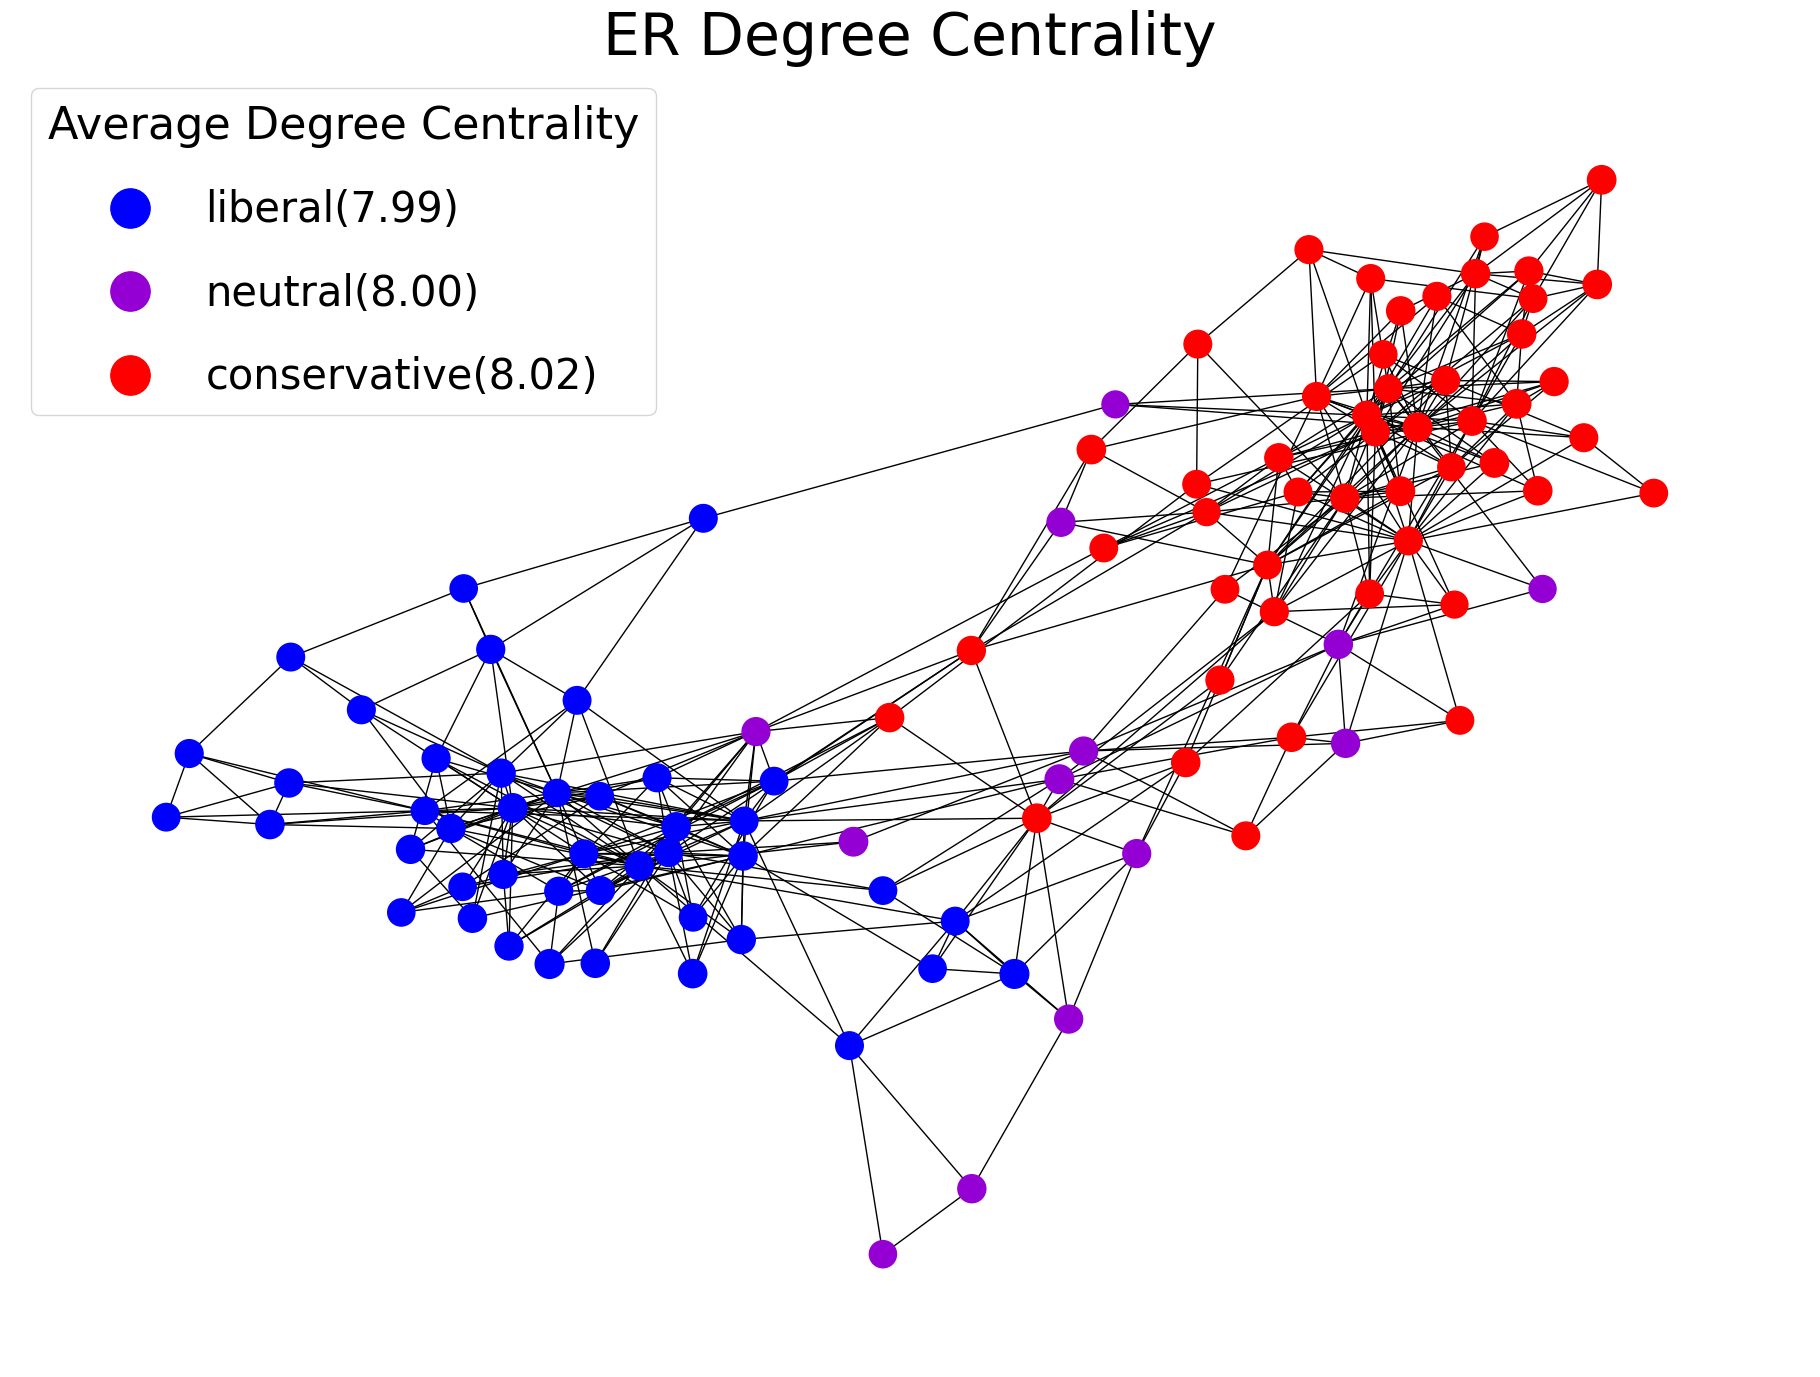

In [30]:
# ER degree centrality
plt.figure(figsize=(18,13))
pos = nx.spring_layout(G, seed=12345)
mean_rd_dgr = "mean_er_dc"
nx.draw(G, pos, node_size=mean_er_dc)
nx.draw_networkx_nodes(G, pos,
                       nodelist=liberal.keys(),
                       node_size=[atts[mean_rd_dgr]*5e+3 for atts in liberal.values()],
                       node_color='blue'#, label='liberal'
                       )
nx.draw_networkx_nodes(G, pos,
                       nodelist=neutral.keys(),
                       node_size=[atts[mean_rd_dgr]*5e+3 for atts in neutral.values()],
                       node_color='darkviolet'#, label='neutral'
                       )
nx.draw_networkx_nodes(G, pos,
                       nodelist=conservative.keys(),
                       node_size=[atts[mean_rd_dgr]*5e+3 for atts in conservative.values()],
                       node_color='red'#, label='conservative'
                       )

dgr_liberal = np.mean([atts[mean_rd_dgr]*1e+2 for atts in liberal.values()])
dgr_neutral = np.mean([atts[mean_rd_dgr]*1e+2 for atts in neutral.values()])
dgr_conservative = np.mean([atts[mean_rd_dgr]*1e+2 for atts in conservative.values()])
attribute = [dgr_liberal, dgr_neutral, dgr_conservative]

plt.plot([], [], 'o', color='blue', markersize = np.sqrt(dgr_liberal*100), label = f"liberal({dgr_liberal:.2f})")
plt.plot([], [], 'o', color='darkviolet', markersize = np.sqrt(dgr_neutral*100), label = f"neutral({dgr_neutral:.2f})")
plt.plot([], [], 'o', color='red', markersize = np.sqrt(dgr_conservative*100), label = f"conservative({dgr_conservative:.2f})")
plt.legend(fontsize=30, labelspacing=1, loc='upper left', frameon=True, title="Average Degree Centrality", title_fontsize=32)
plt.title('ER Degree Centrality', fontsize=42)

plt.show()

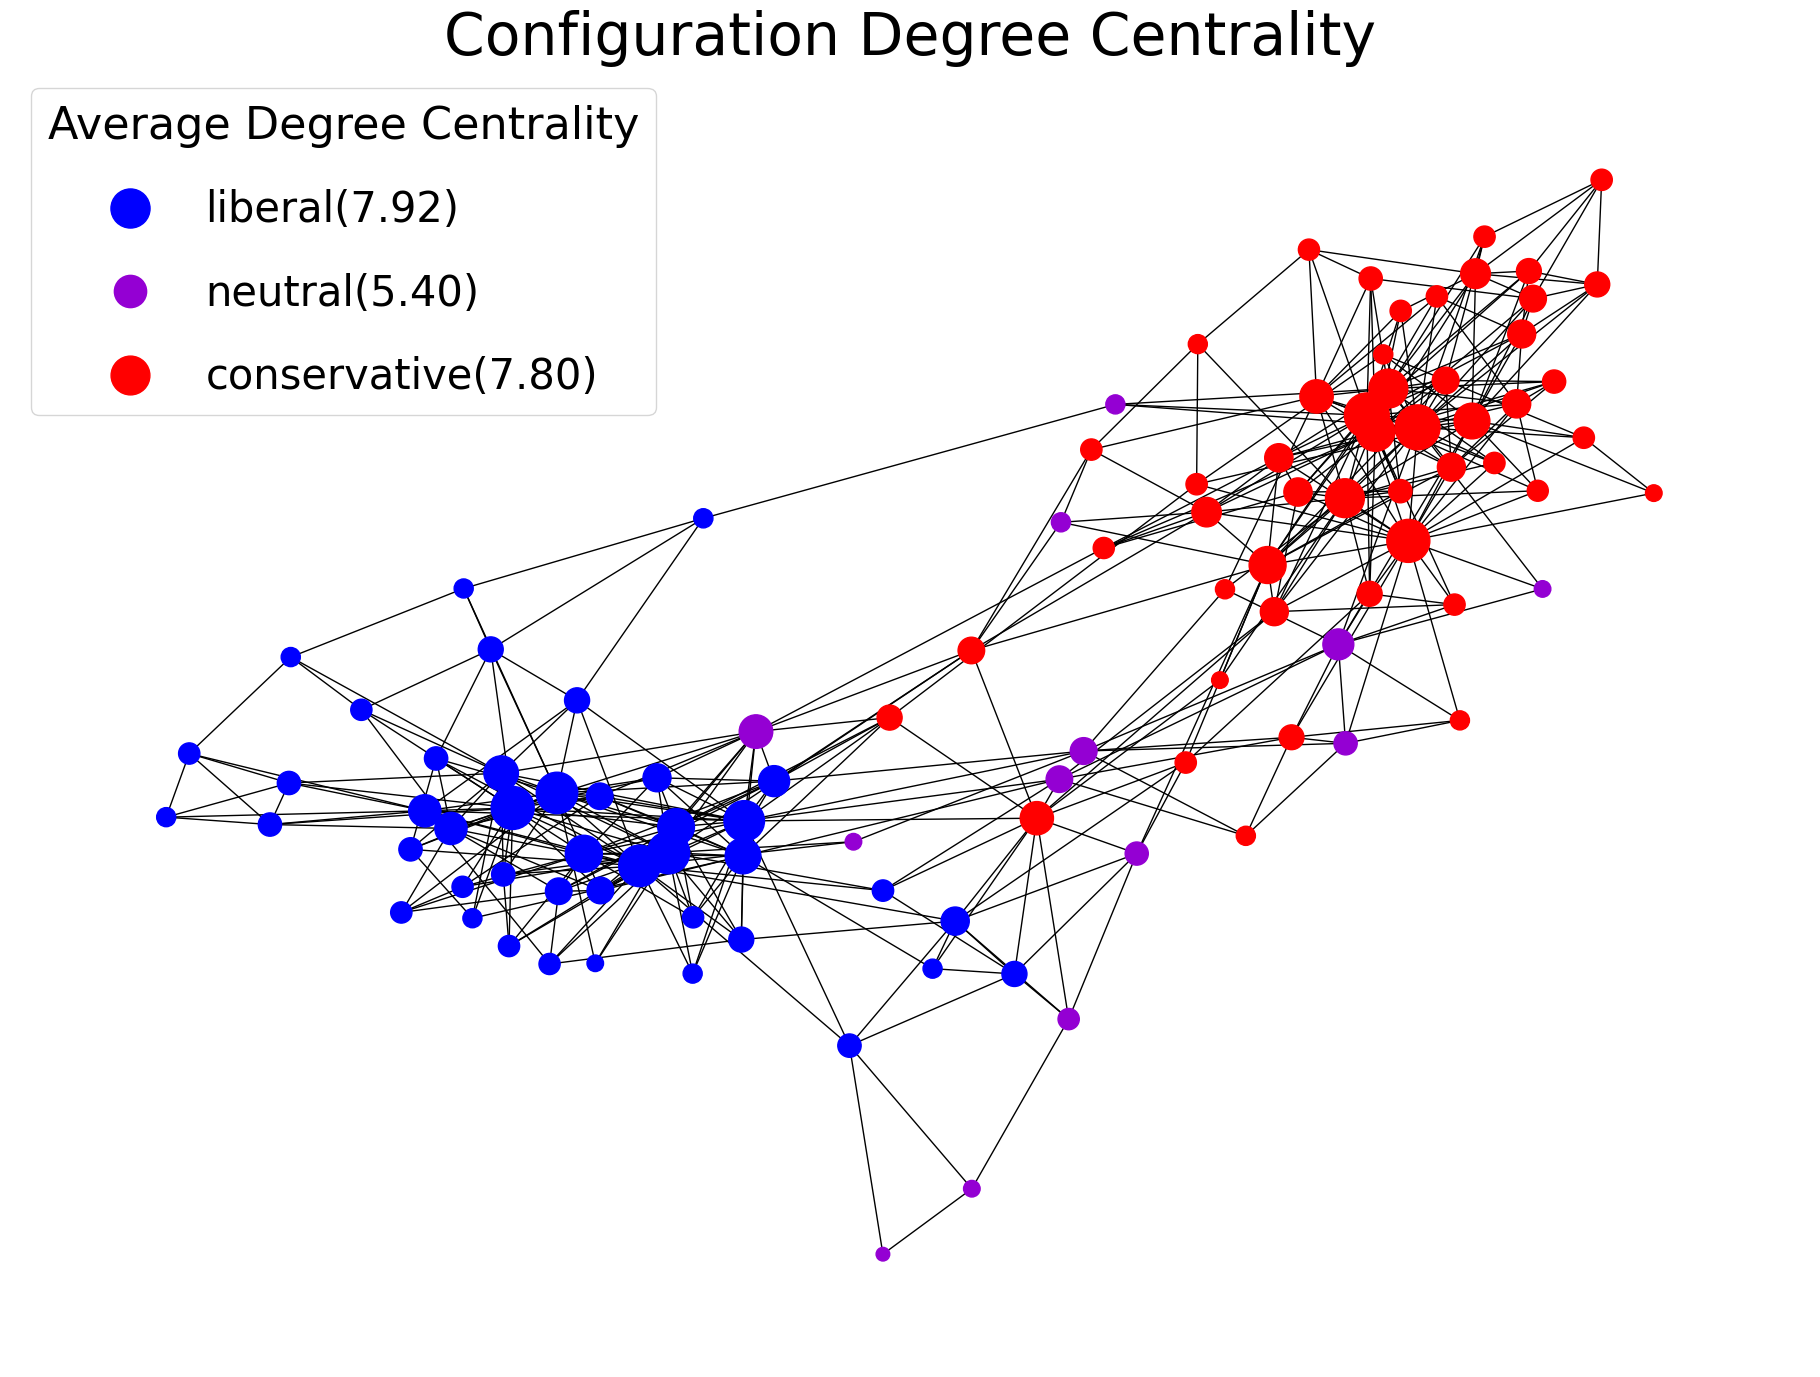

In [31]:
# Configuration degree centrality
plt.figure(figsize=(18,13))
pos = nx.spring_layout(G, seed=12345)
mean_rd_dgr = "mean_cm_dc"
nx.draw(G, pos, node_size=mean_cm_dc)
nx.draw_networkx_nodes(G, pos,
                       nodelist=liberal.keys(),
                       node_size=[atts[mean_rd_dgr]*5e+3 for atts in liberal.values()],
                       node_color='blue'#, label='liberal'
                       )
nx.draw_networkx_nodes(G, pos,
                       nodelist=neutral.keys(),
                       node_size=[atts[mean_rd_dgr]*5e+3 for atts in neutral.values()],
                       node_color='darkviolet'#, label='neutral'
                       )
nx.draw_networkx_nodes(G, pos,
                       nodelist=conservative.keys(),
                       node_size=[atts[mean_rd_dgr]*5e+3 for atts in conservative.values()],
                       node_color='red'#, label='conservative'
                       )

dgr_liberal = np.mean([atts[mean_rd_dgr]*1e+2 for atts in liberal.values()])
dgr_neutral = np.mean([atts[mean_rd_dgr]*1e+2 for atts in neutral.values()])
dgr_conservative = np.mean([atts[mean_rd_dgr]*1e+2 for atts in conservative.values()])
attribute = [dgr_liberal, dgr_neutral, dgr_conservative]

plt.plot([], [], 'o', color='blue', markersize = np.sqrt(dgr_liberal*100), label = f"liberal({dgr_liberal:.2f})")
plt.plot([], [], 'o', color='darkviolet', markersize = np.sqrt(dgr_neutral*100), label = f"neutral({dgr_neutral:.2f})")
plt.plot([], [], 'o', color='red', markersize = np.sqrt(dgr_conservative*100), label = f"conservative({dgr_conservative:.2f})")
plt.legend(fontsize=30, labelspacing=1, loc='upper left', frameon=True, title="Average Degree Centrality", title_fontsize=32)
plt.title('Configuration Degree Centrality', fontsize=42)

plt.show()

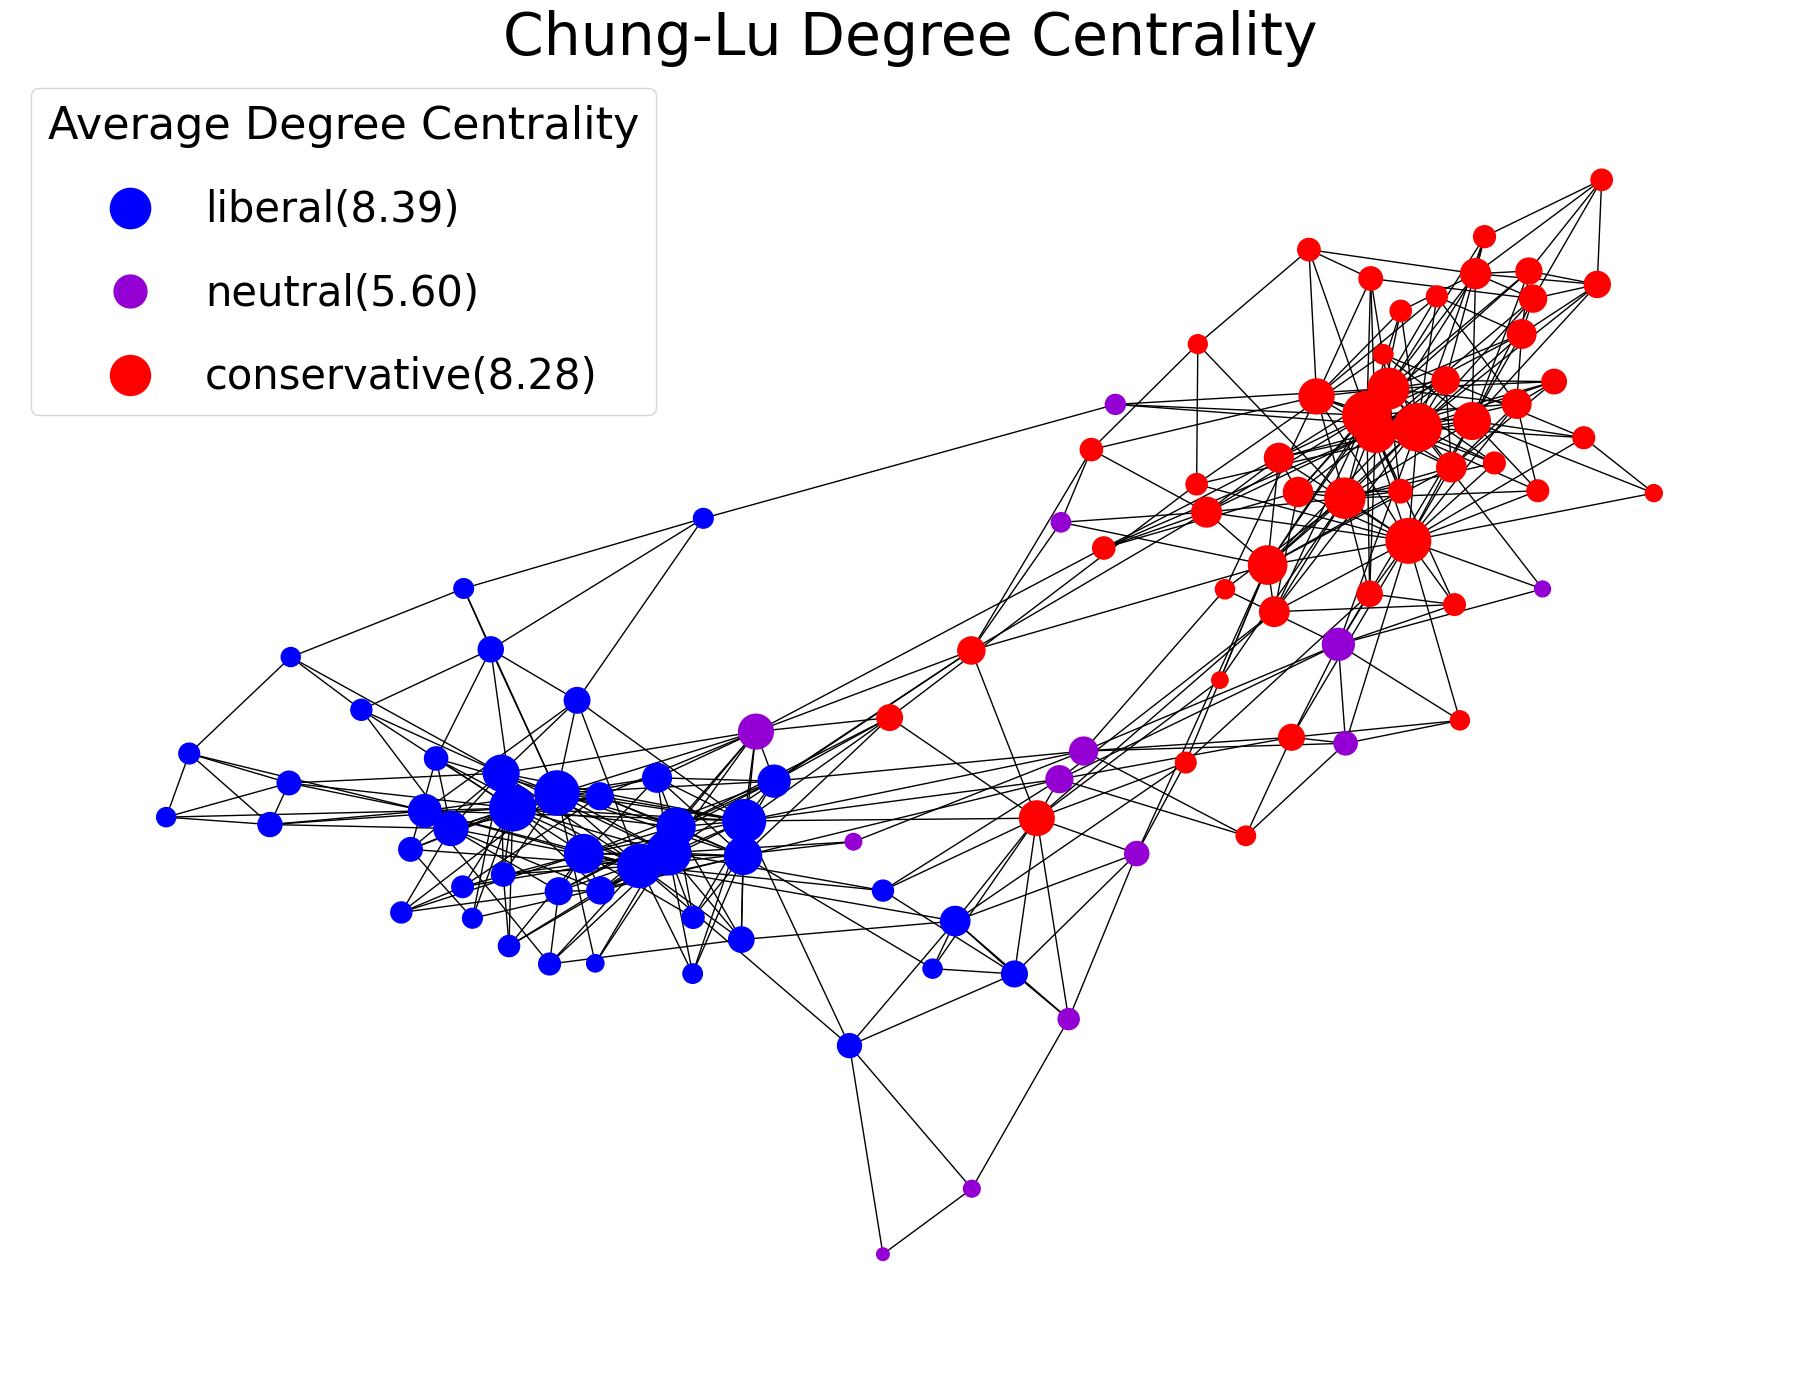

In [32]:
# Chung-Lu degree centrality
plt.figure(figsize=(18,13))
pos = nx.spring_layout(G, seed=12345)
mean_rd_dgr = "mean_cl_dc"
nx.draw(G, pos, node_size=mean_cl_dc)
nx.draw_networkx_nodes(G, pos,
                       nodelist=liberal.keys(),
                       node_size=[atts[mean_rd_dgr]*5e+3 for atts in liberal.values()],
                       node_color='blue'#, label='liberal'
                       )
nx.draw_networkx_nodes(G, pos,
                       nodelist=neutral.keys(),
                       node_size=[atts[mean_rd_dgr]*5e+3 for atts in neutral.values()],
                       node_color='darkviolet'#, label='neutral'
                       )
nx.draw_networkx_nodes(G, pos,
                       nodelist=conservative.keys(),
                       node_size=[atts[mean_rd_dgr]*5e+3 for atts in conservative.values()],
                       node_color='red'#, label='conservative'
                       )

dgr_liberal = np.mean([atts[mean_rd_dgr]*1e+2 for atts in liberal.values()])
dgr_neutral = np.mean([atts[mean_rd_dgr]*1e+2 for atts in neutral.values()])
dgr_conservative = np.mean([atts[mean_rd_dgr]*1e+2 for atts in conservative.values()])
attribute = [dgr_liberal, dgr_neutral, dgr_conservative]

plt.plot([], [], 'o', color='blue', markersize = np.sqrt(dgr_liberal*100), label = f"liberal({dgr_liberal:.2f})")
plt.plot([], [], 'o', color='darkviolet', markersize = np.sqrt(dgr_neutral*100), label = f"neutral({dgr_neutral:.2f})")
plt.plot([], [], 'o', color='red', markersize = np.sqrt(dgr_conservative*100), label = f"conservative({dgr_conservative:.2f})")
plt.legend(fontsize=30, labelspacing=1, loc='upper left', frameon=True, title="Average Degree Centrality", title_fontsize=32)
plt.title('Chung-Lu Degree Centrality', fontsize=42)

plt.show()

#### 2.2.2.2. Betweenness Centrality

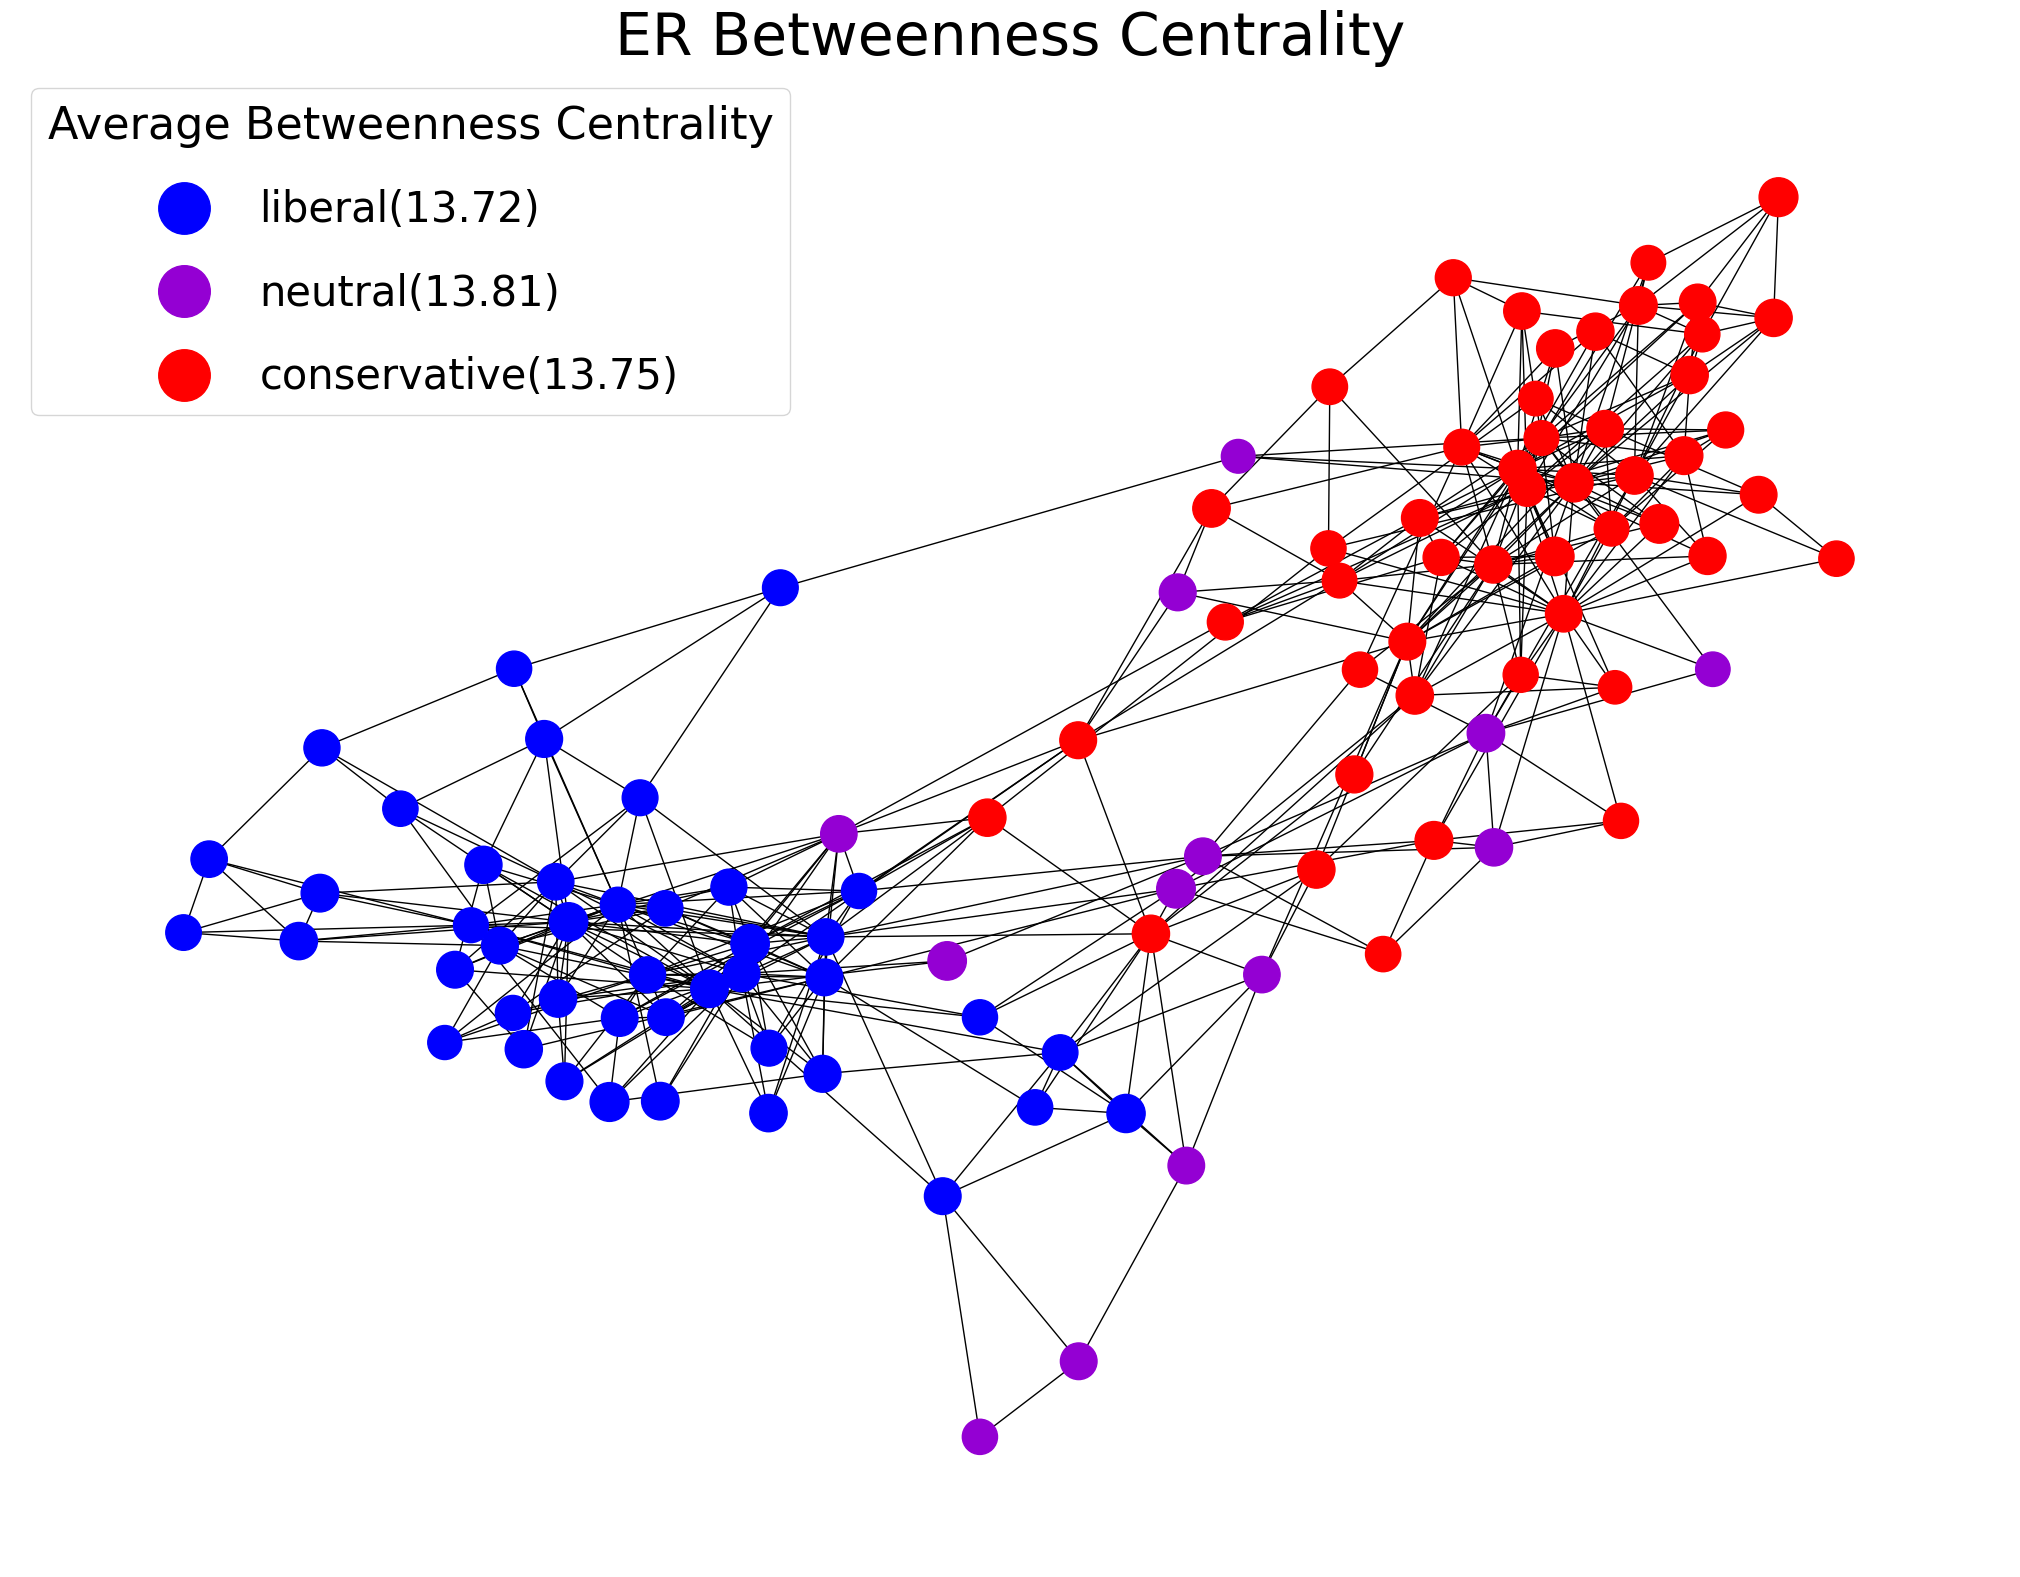

In [33]:
# ER betweenness centrality
plt.figure(figsize=(20,15))

pos = nx.spring_layout(G, seed=12345)
mean_rd_btw = "mean_er_bc"
nx.draw(G, pos, node_size=mean_er_bc)

scale = 5e+4
nx.draw_networkx_nodes(G, pos,
                       nodelist=liberal.keys(),
                       node_size=[atts[mean_rd_btw]*scale for atts in liberal.values()],
                       node_color='blue'#, label='liberal'
                       )
nx.draw_networkx_nodes(G, pos,
                       nodelist=neutral.keys(),
                       node_size=[atts[mean_rd_btw]*scale for atts in neutral.values()],
                       node_color='darkviolet'#, label='neutral'
                       )
nx.draw_networkx_nodes(G, pos,
                       nodelist=conservative.keys(),
                       node_size=[atts[mean_rd_btw]*scale for atts in conservative.values()],
                       node_color='red'#, label='conservative'
                       )

legend_scale = 1e+3
btw_liberal = np.mean([atts[mean_rd_btw]*legend_scale for atts in liberal.values()])
btw_neutral = np.mean([atts[mean_rd_btw]*legend_scale for atts in neutral.values()])
btw_conservative = np.mean([atts[mean_rd_btw]*legend_scale for atts in conservative.values()])

plt.plot([], [], 'o', color='blue', markersize = np.sqrt(btw_liberal*100), label = f"liberal({btw_liberal:.2f})")
plt.plot([], [], 'o', color='darkviolet', markersize = np.sqrt(btw_neutral*100), label = f"neutral({btw_neutral:.2f})")
plt.plot([], [], 'o', color='red', markersize = np.sqrt(btw_conservative*100), label = f"conservative({btw_conservative:.2f})")
plt.legend(fontsize=30, labelspacing=1, loc='upper left', frameon=True, title="Average Betweenness Centrality", title_fontsize=32)
plt.title('ER Betweenness Centrality', fontsize=42)

plt.show()

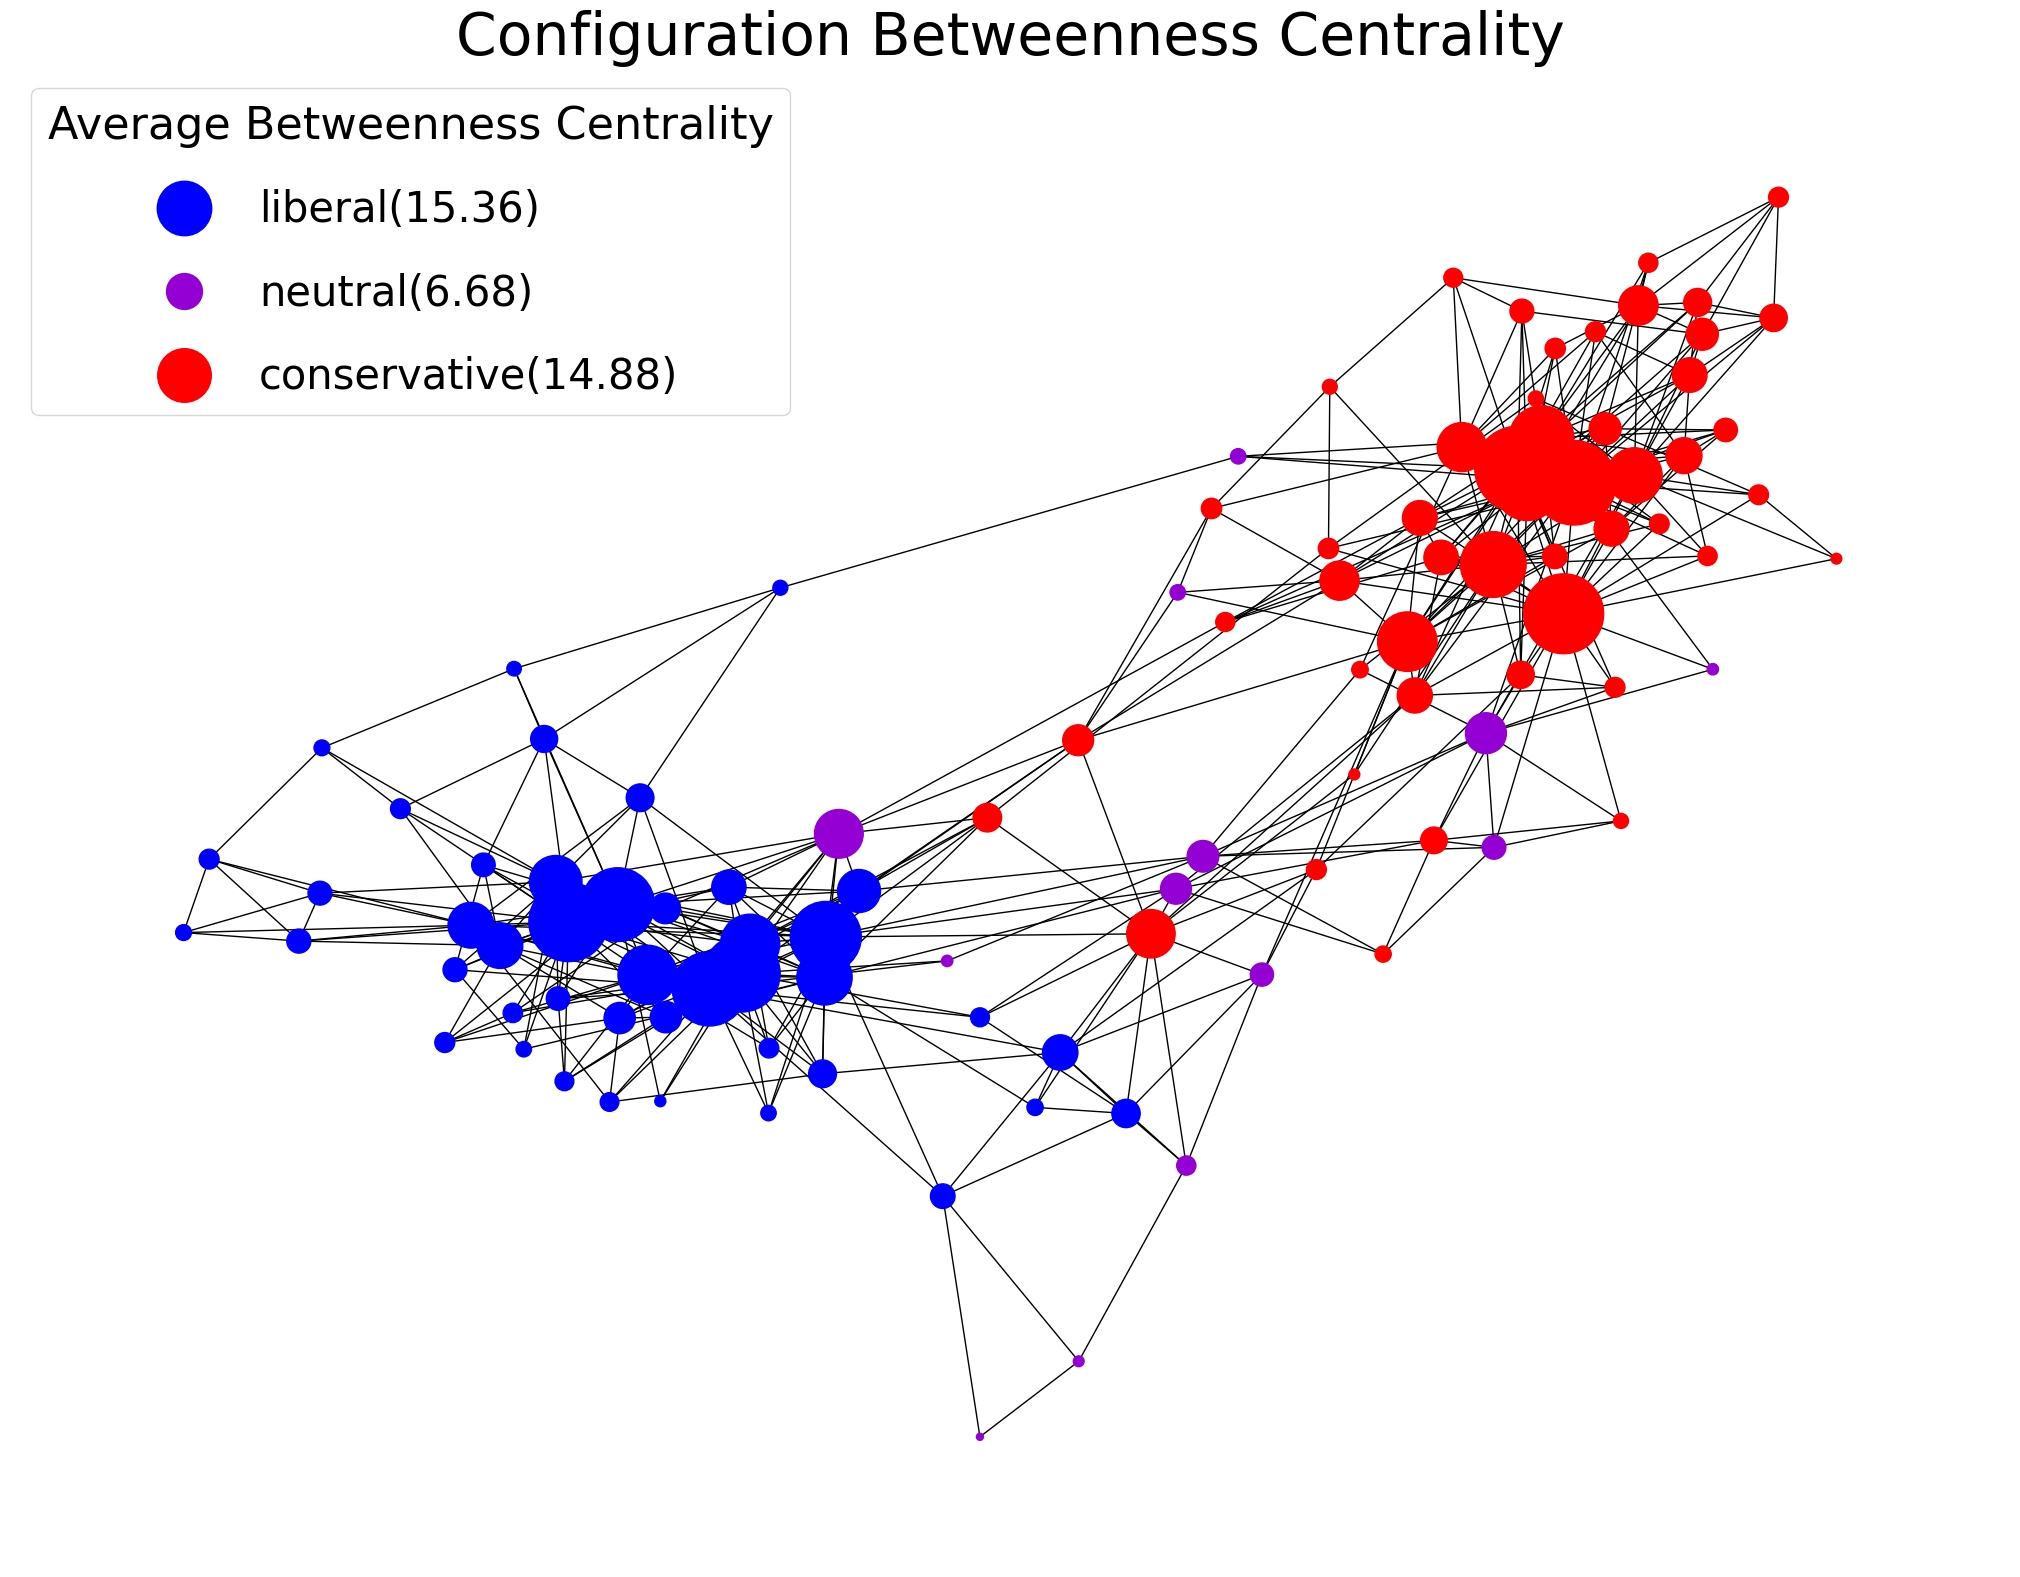

In [34]:
# Configuration betweenness centrality
plt.figure(figsize=(20,15))

pos = nx.spring_layout(G, seed=12345)
mean_rd_btw = "mean_cm_bc"
nx.draw(G, pos, node_size=mean_cm_bc)

scale = 5e+4
nx.draw_networkx_nodes(G, pos,
                       nodelist=liberal.keys(),
                       node_size=[atts[mean_rd_btw]*scale for atts in liberal.values()],
                       node_color='blue'#, label='liberal'
                       )
nx.draw_networkx_nodes(G, pos,
                       nodelist=neutral.keys(),
                       node_size=[atts[mean_rd_btw]*scale for atts in neutral.values()],
                       node_color='darkviolet'#, label='neutral'
                       )
nx.draw_networkx_nodes(G, pos,
                       nodelist=conservative.keys(),
                       node_size=[atts[mean_rd_btw]*scale for atts in conservative.values()],
                       node_color='red'#, label='conservative'
                       )

legend_scale = 1e+3
btw_liberal = np.mean([atts[mean_rd_btw]*legend_scale for atts in liberal.values()])
btw_neutral = np.mean([atts[mean_rd_btw]*legend_scale for atts in neutral.values()])
btw_conservative = np.mean([atts[mean_rd_btw]*legend_scale for atts in conservative.values()])

plt.plot([], [], 'o', color='blue', markersize = np.sqrt(btw_liberal*100), label = f"liberal({btw_liberal:.2f})")
plt.plot([], [], 'o', color='darkviolet', markersize = np.sqrt(btw_neutral*100), label = f"neutral({btw_neutral:.2f})")
plt.plot([], [], 'o', color='red', markersize = np.sqrt(btw_conservative*100), label = f"conservative({btw_conservative:.2f})")
plt.legend(fontsize=30, labelspacing=1, loc='upper left', frameon=True, title="Average Betweenness Centrality", title_fontsize=32)
plt.title('Configuration Betweenness Centrality', fontsize=42)

plt.show()

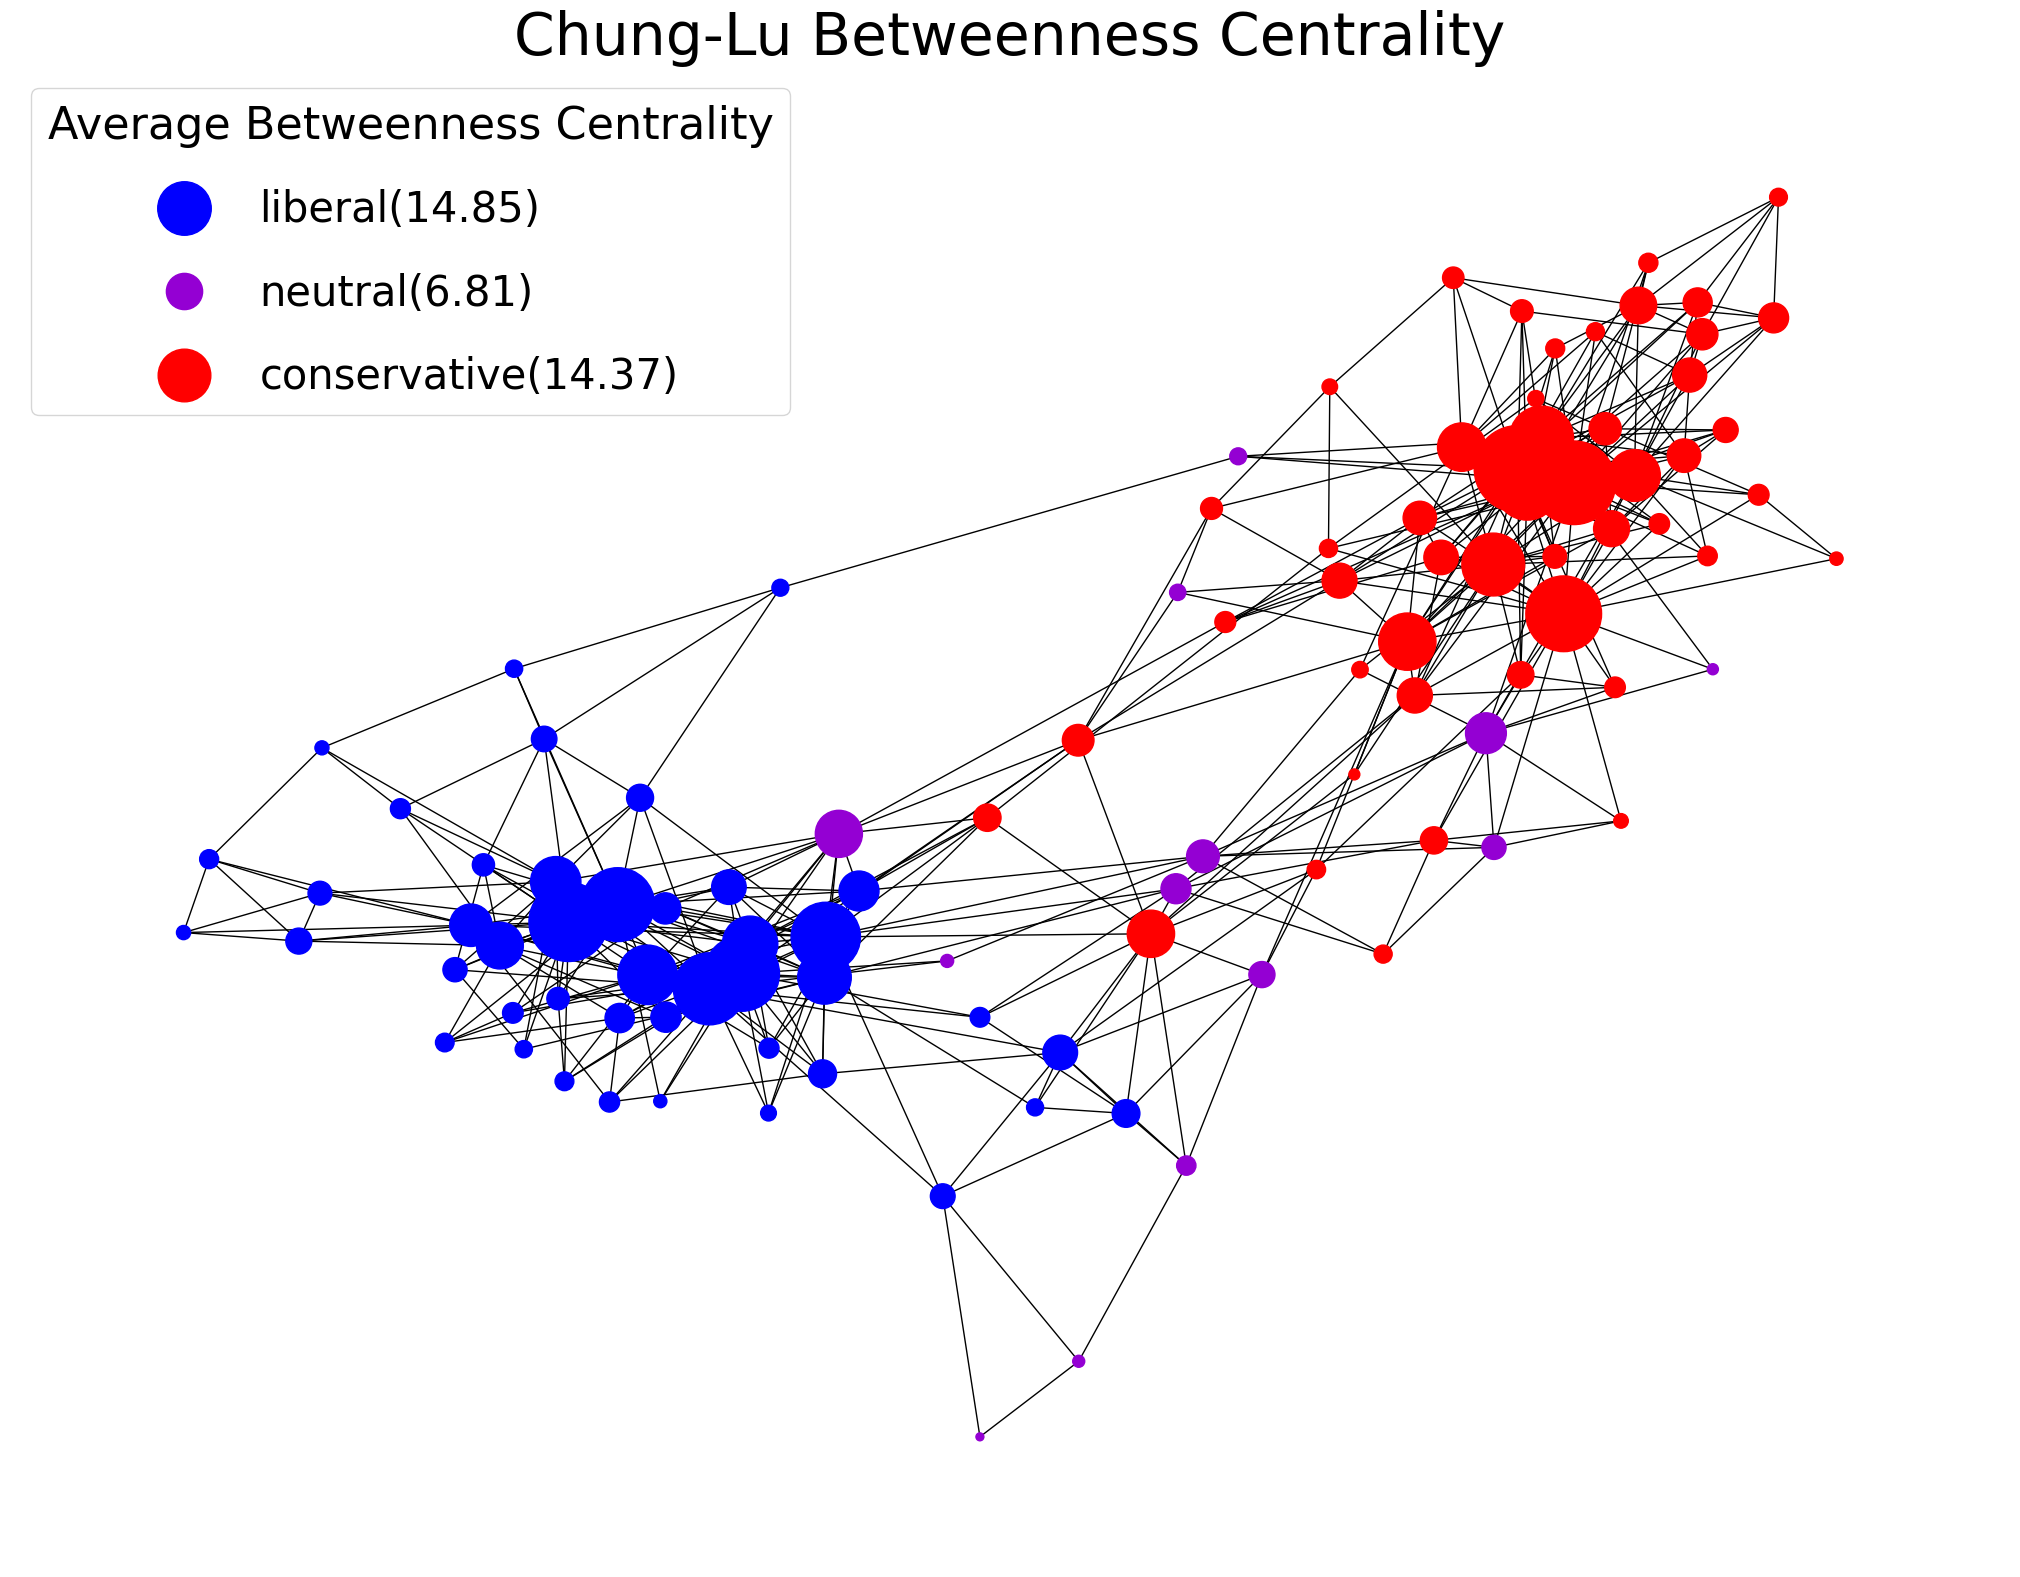

In [35]:
# Chung-Lu betweenness centrality
plt.figure(figsize=(20,15))

pos = nx.spring_layout(G, seed=12345)
mean_rd_btw = "mean_cl_bc"
nx.draw(G, pos, node_size=mean_cl_bc)

scale = 5e+4
nx.draw_networkx_nodes(G, pos,
                       nodelist=liberal.keys(),
                       node_size=[atts[mean_rd_btw]*scale for atts in liberal.values()],
                       node_color='blue'#, label='liberal'
                       )
nx.draw_networkx_nodes(G, pos,
                       nodelist=neutral.keys(),
                       node_size=[atts[mean_rd_btw]*scale for atts in neutral.values()],
                       node_color='darkviolet'#, label='neutral'
                       )
nx.draw_networkx_nodes(G, pos,
                       nodelist=conservative.keys(),
                       node_size=[atts[mean_rd_btw]*scale for atts in conservative.values()],
                       node_color='red'#, label='conservative'
                       )

legend_scale = 1e+3
btw_liberal = np.mean([atts[mean_rd_btw]*legend_scale for atts in liberal.values()])
btw_neutral = np.mean([atts[mean_rd_btw]*legend_scale for atts in neutral.values()])
btw_conservative = np.mean([atts[mean_rd_btw]*legend_scale for atts in conservative.values()])

plt.plot([], [], 'o', color='blue', markersize = np.sqrt(btw_liberal*100), label = f"liberal({btw_liberal:.2f})")
plt.plot([], [], 'o', color='darkviolet', markersize = np.sqrt(btw_neutral*100), label = f"neutral({btw_neutral:.2f})")
plt.plot([], [], 'o', color='red', markersize = np.sqrt(btw_conservative*100), label = f"conservative({btw_conservative:.2f})")
plt.legend(fontsize=30, labelspacing=1, loc='upper left', frameon=True, title="Average Betweenness Centrality", title_fontsize=32)
plt.title('Chung-Lu Betweenness Centrality', fontsize=42)

plt.show()